## Link to dataset:
 - Kaggle - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
 - GitHub - https://github.com/soumyadas96/Data-Analysis-Projects/blob/main/Heart%20Disease%20EDA/heart.csv

## About Dataset:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, Purchase amount) against transactions in their store on Black Friday.

The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and total revenue from the sales on Black Friday.

Now, the company wants us to analyze the data and give recommendations on how they can increase/ boost sales.

### Columns in the dataset:
**Age** - **Sex** - **ChestPainType** (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic) - **RestingBP** (mm Hg) - **Cholesterol** (mm/dl) - **FastingBS** (1: if FastingBS > 120 mg/dl, 0: otherwise) - **Resting ECG** (Normal: Normal, ST: having ST-T wave abnormality; T wave inversions and/or ST elevation or depression of > 0.05 mV, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria) - **MaxHR** (Numeric value between 60 and 202) - **ExerciseAngina** (Y: Yes, N: No) - **Oldpeak** (ST : Numeric value measured in depression) - **ST_Slope** (Up: upsloping, Flat: flat, Down: downsloping) - **HeartDisease** (1: heart disease, 0: Normal)

### Here's our approach:
We will achieve our goal in 3 phases:

1. **Data Cleaning :** We will check all the dataset for any mishandled row / column with null values or outliers (based on the distribution followed) and take required actions.
2. **Data Analysis :** We will carry out Univariate, Bivariate, and Multivariate Analysis between each columns and end up with correlation analysis to confirm our findings.
3. **Findings and Recommendations :** Lastly, we will gather our findings to give final recommendations.

### Tool and Libraries Used:
- Tool
  - Python 3.11.7
- Libraries
  - numpy 1.26.4
  - pandas 2.14
  - seaborn 0.13.2
  - matplotlib 3.8.0
  - tabulate 0.9.0

### What questions are expected to solve?
- Reliable relationships to predict Heart Disease
- Which category of people have more possibility to have a heart disease?
- Which columns have weak relationships in the given dataset?

## Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
## checking for duplicates

print('No. of duplicates in the dataset:',df.duplicated().sum())

No. of duplicates in the dataset: 0


### Univariate Analysis

In [6]:
## gathering essential details before visualization and analysis

print()
print("--- Null Values ---")
print()
print(df.isnull().sum())
print()
print("----------------------- Description (Numerical) -----------------------")
print()
df.describe().T


--- Null Values ---

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

----------------------- Description (Numerical) -----------------------



,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
print()
print("*********** Description (Categorical) ************")
print()
numerical_columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
print("Unique values in each column:")
for categroical in df.columns:
    if categroical not in numerical_columns:
        print(df[categroical].value_counts())
        print("*"*50)


*********** Description (Categorical) ************

Unique values in each column:
Sex
M    725
F    193
Name: count, dtype: int64
**************************************************
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
**************************************************
FastingBS
0    704
1    214
Name: count, dtype: int64
**************************************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
**************************************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
**************************************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
**************************************************
HeartDisease
1    508
0    410
Name: count, dtype: int64
**************************************************


#### Outliers

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15480\3577032331.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins = 25)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15480\3577032331.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.RestingBP)
C:\Users\LENOVO\AppData\Local\Temp

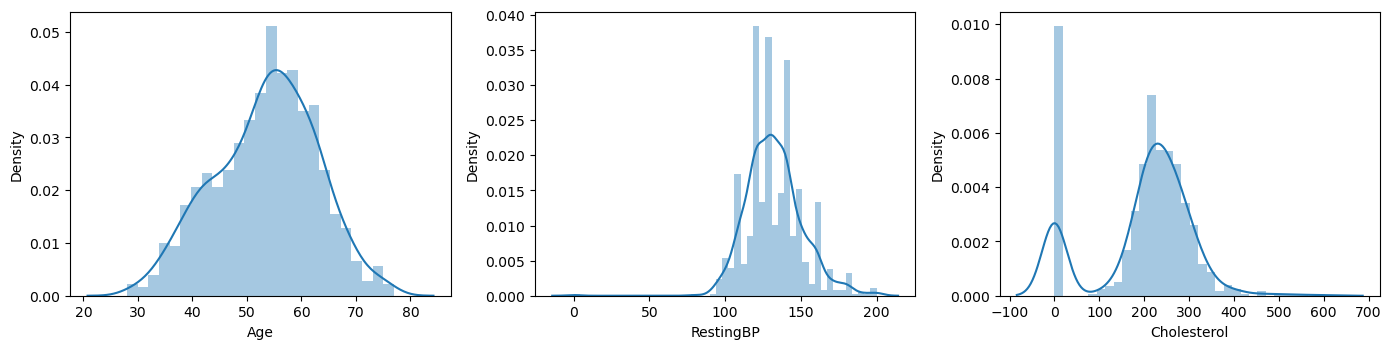

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15480\3577032331.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MaxHR)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15480\3577032331.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Oldpeak)


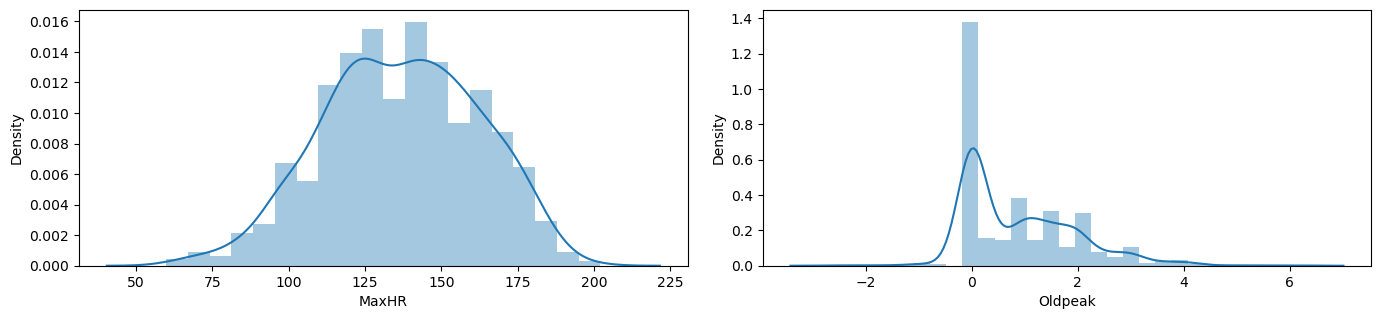

In [8]:
plt.figure(1,figsize=(14,10))

## Age

plt.subplot(331)
sns.distplot(df.Age, bins = 25)

## Blood Pressure in mm Hg

plt.subplot(332)
sns.distplot(df.RestingBP)

## Cholesterol in mm/dl

plt.subplot(333)
sns.distplot(df.Cholesterol)


plt.tight_layout()
plt.show()

plt.figure(2,figsize=(14,6))

## MaxHR - Heart Rate can be between 60 - 202

plt.subplot(221)
sns.distplot(df.MaxHR)

## OldPeak  Numerical value in depression

plt.subplot(222)
sns.distplot(df.Oldpeak)

plt.tight_layout()
plt.show()

###### Observation:
There is a peak near '0' for Cholesterol Level measured in mm/dl. Hence we will replace them with the mean value instead of maximum or minimum (other than 0) so that the over all distribution is not affected.

In [9]:
## finding no. of cholesterol values which are marked as 0

zero_Cholesterol = len(df[df.Cholesterol == 0])
print("No. of rows having Cholesterol value as 0:", zero_Cholesterol)

No. of rows having Cholesterol value as 0: 172


In [10]:
## finding mean

avg = df[df.Cholesterol != 0]['Cholesterol'].mean()
avg = round(avg,2)
print(avg)

244.64


In [11]:
## making a copy view of original dataframe so that original data is not affected

df_no_outliers = df.copy()

## replacing 0 values with avg
df_no_outliers.loc[df.Cholesterol == 0,"Cholesterol"] = avg

## confirming 0 is replaced

zero_Cholesterol = len(df_no_outliers[df_no_outliers.Cholesterol == 0])
print("No. of rows having Cholesterol value as '0' after replacing '0s' with mean:", zero_Cholesterol)

No. of rows having Cholesterol value as '0' after replacing '0s' with mean: 0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15480\1361167964.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '244.64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_no_outliers.loc[df.Cholesterol == 0,"Cholesterol"] = avg


###### Box Plot

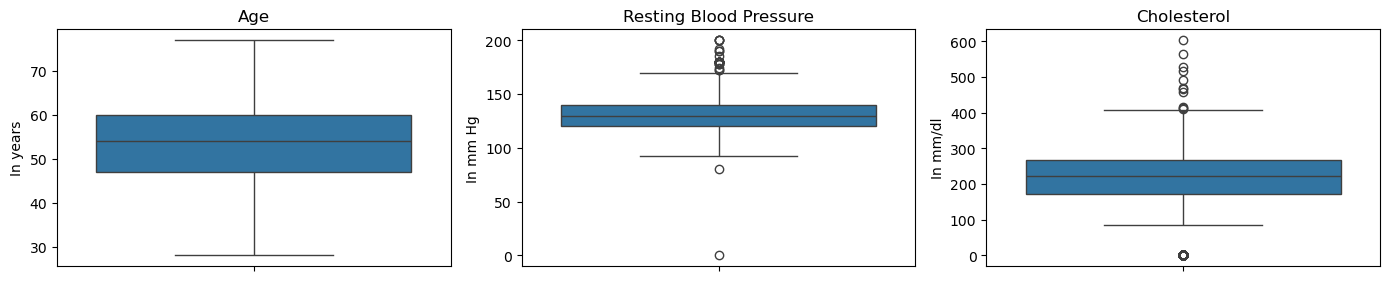

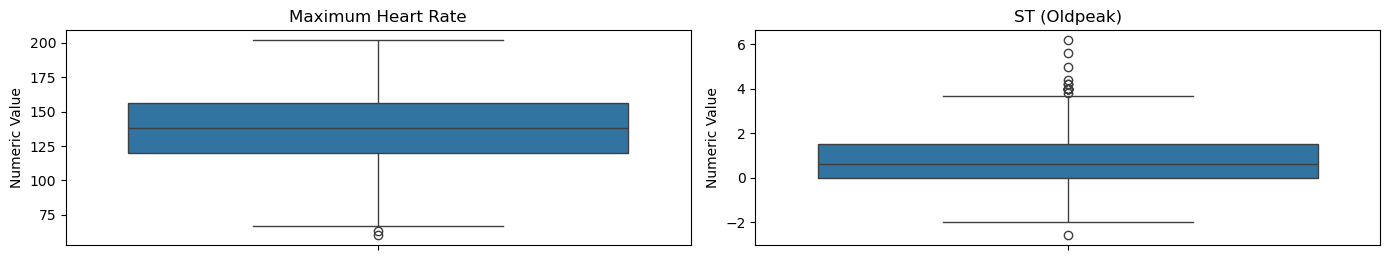

In [12]:
plt.figure(1,figsize=(14,8))

## Age

plt.subplot(331)
sns.boxplot(df.Age)
plt.title("Age")
plt.ylabel("In years")

## Blood Pressure in mm Hg

plt.subplot(332)
sns.boxplot(df.RestingBP)
plt.title("Resting Blood Pressure")
plt.ylabel("In mm Hg")

## Cholesterol in mm/dl

plt.subplot(333)
sns.boxplot(df.Cholesterol)
plt.title("Cholesterol")
plt.ylabel("In mm/dl")


plt.tight_layout()
plt.show()

plt.figure(2,figsize=(14,5))

## MaxHR - Heart Rate can be between 60 - 202

plt.subplot(221)
sns.boxplot(df.MaxHR)
plt.title("Maximum Heart Rate")
plt.ylabel("Numeric Value")

## OldPeak  Numerical value in depression

plt.subplot(222)
sns.boxplot(df.Oldpeak)
plt.title("ST (Oldpeak)")
plt.ylabel("Numeric Value")

plt.tight_layout()
plt.show()

##### Capping using Percentile approach

In [13]:
## creating a new dataframe with removed outliers
## we use percentile approach as the graphs for target coulumn purchase shows neither skewed nor normal distribution
## we will consider 1% to 99%

## storing the numerical column names in a list[]

numerical_features = ['Age','RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

print("*"*104)

## capping outliers
for numerical in numerical_features:
    print("Column:", numerical)
    min = df_no_outliers[numerical].quantile(0.01)
    max = df_no_outliers[numerical].quantile(0.99)
    
    outliers = len(df_no_outliers[(df_no_outliers[numerical] < min) | (df_no_outliers[numerical] > max)])
    print("Minimum Value in ", numerical,": ", min,sep = "")
    print("Maximum Value in ", numerical,": ", max,sep = "")
    
    #finding again no. of rows beyond the limit
    
    print("No. of outliers in",numerical,"before capping:", outliers)
    print("Outliers in ",numerical,": ",(df[(df[numerical] < min) | (df[numerical] > max)][numerical].unique())," (before capping)", sep = "")

    
    ## capping outliers
    
    df_no_outliers[numerical] = np.where(df_no_outliers[numerical] > max, max,
                                       np.where(df_no_outliers[numerical] < min, min, df_no_outliers[numerical]))

    outliers_capped = len(df_no_outliers[(df_no_outliers[numerical] < min) | (df_no_outliers[numerical] > max)])

    #finding again no. of rows beyond the limit after Outlier removal

    print("No. of outliers in",numerical,"before capping:", outliers_capped)
    print("Outliers in ",numerical,": ",(df_no_outliers[(df_no_outliers[numerical] < min) | (df_no_outliers[numerical] > max)][numerical].unique())," (after capping)", sep = "")
    print("*"*104)

    
    
## for cholesterol column
## having 0 cholesterol is not possible

********************************************************************************************************
Column: Age
Minimum Value in Age: 32.0
Maximum Value in Age: 74.0
No. of outliers in Age before capping: 14
Outliers in Age: [31 29 28 30 77 75 76] (before capping)
No. of outliers in Age before capping: 0
Outliers in Age: [] (after capping)
********************************************************************************************************
Column: RestingBP
Minimum Value in RestingBP: 95.0
Maximum Value in RestingBP: 180.0
No. of outliers in RestingBP before capping: 13
Outliers in RestingBP: [190  92 200  80 185   0  94 192] (before capping)
No. of outliers in RestingBP before capping: 0
Outliers in RestingBP: [] (after capping)
********************************************************************************************************
Column: Cholesterol
Minimum Value in Cholesterol: 129.34
Maximum Value in Cholesterol: 411.4900000000001
No. of outliers in Cholesterol before capp

## Data Analysis

### Univariate Analysis

#### Numerical Columns

##### Age

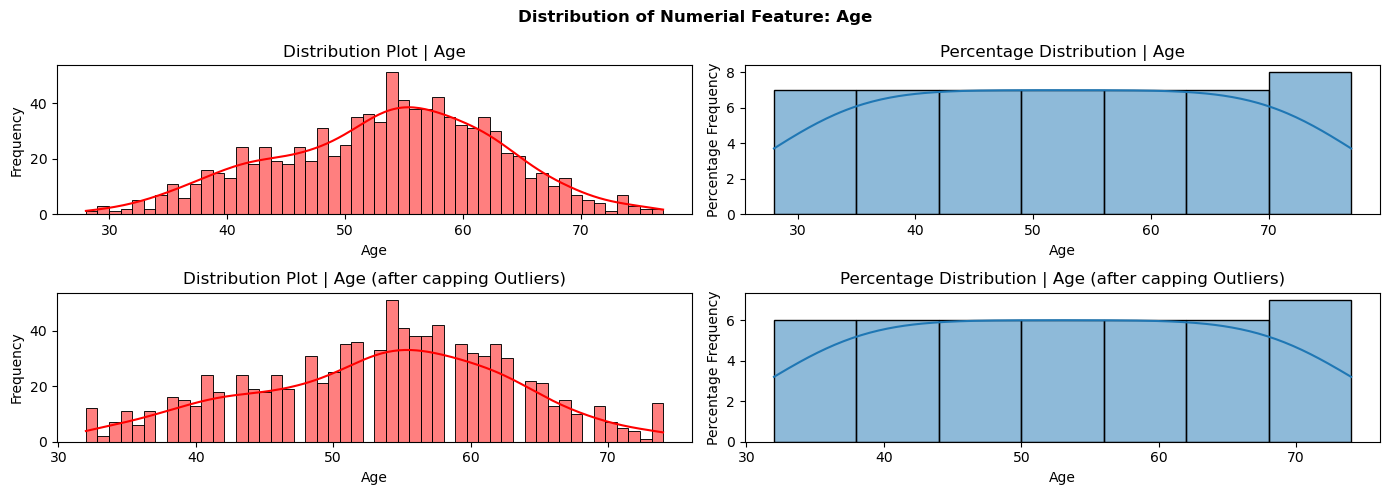

+-----------+---------------------------+--------------------------+
|    Age    | Before Capping (in years) | After Capping (in years) |
+-----------+---------------------------+--------------------------+
|   Mean    |           53.51           |          53.52           |
|   Mode    |            54             |           54.0           |
| Std. dev. |           9.43            |           9.35           |
+-----------+---------------------------+--------------------------+


In [14]:
## Age

plt.figure(1, figsize = (14,5))

plt.suptitle('Distribution of Numerial Feature: Age', fontweight = "bold")
plt.subplot(221)
sns.histplot(data = df, x = "Age",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Age")
plt.ylabel("Frequency")

plt.subplot(222)
df_temp = df['Age'].value_counts(normalize = 2).reset_index()
df_temp.columns = ['Age', 'Percentage']
sns.histplot(data = df_temp, x = "Age", kde = True)
plt.title("Percentage Distribution | Age")
plt.ylabel("Percentage Frequency")

plt.subplot(223)
sns.histplot(data = df_no_outliers, x = "Age",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Age (after capping Outliers)")
plt.ylabel("Frequency")

plt.subplot(224)
df_temp = df_no_outliers['Age'].value_counts(normalize = True).reset_index()
df_temp.columns = ['Age', 'Percentage']
sns.histplot(data = df_temp, x = "Age", kde = True)
plt.title("Percentage Distribution | Age (after capping Outliers)")
plt.ylabel("Percentage Frequency")

plt.tight_layout()
plt.show()

## organizing the data in a list of lists

data = [
    ["Mean", round(df.Age.mean(),2), round(df_no_outliers.Age.mean(),2)],
    ["Mode", df.Age.mode()[0], df_no_outliers.Age.mode()[0]],
    ["Std. dev.", round(df.Age.std(),2), round(df_no_outliers.Age.std(),2)]
]

## defining column headers

headers = ["Age", "Before Capping (in years)", "After Capping (in years)"]

## creating the table using tabulate

table = tabulate(data, headers, tablefmt="pretty")

## printing the table

print(table)

###### Observation:
The distribution is somewhat uniform, but there's a peak around the late 50s. The mean age is approximately 53.52 years with a standard deviation of 9.35 years, and mode of 54 years. Although, the outliers impacted the variations mean, mode, variance, and more, but, the overall distribution was not impacted.

##### Resting Blood Pressure

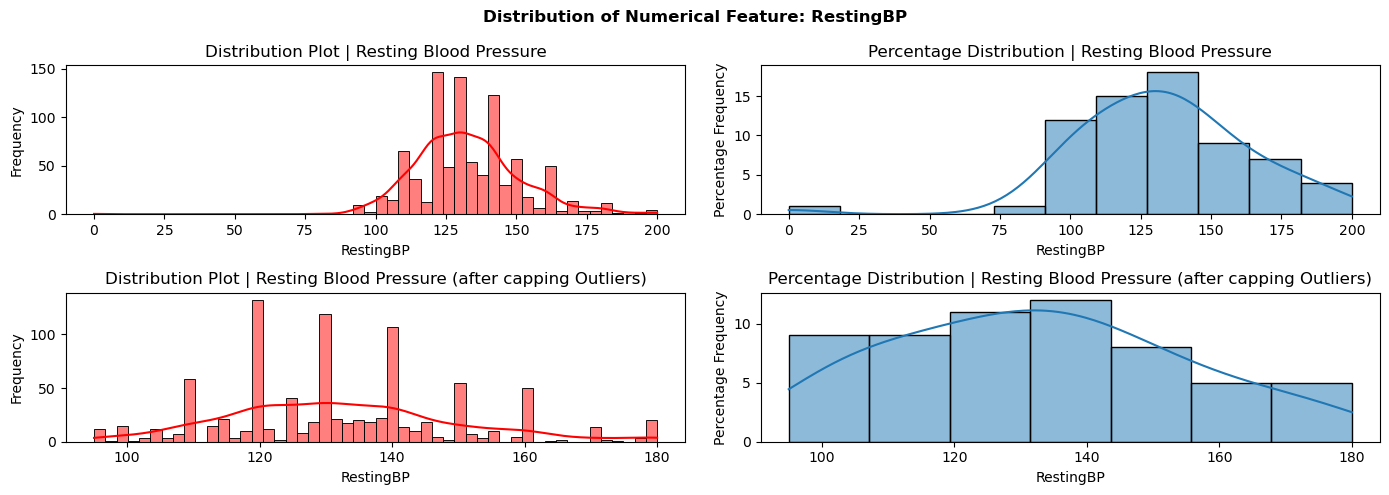

+------------------------+---------------------------+--------------------------+
| Resting Blood Pressure | Before Capping (in mm Hg) | After Capping (in mm Hg) |
+------------------------+---------------------------+--------------------------+
|          Mean          |           132.4           |          132.39          |
|          Mode          |            120            |          120.0           |
|       Std. dev.        |           18.51           |          17.58           |
+------------------------+---------------------------+--------------------------+


In [15]:
## Resting BP

plt.figure(1, figsize = (14,5))

plt.suptitle('Distribution of Numerical Feature: RestingBP', fontweight = "bold")
plt.subplot(221)
sns.histplot(data = df, x = "RestingBP",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Resting Blood Pressure")
plt.ylabel("Frequency")

plt.subplot(222)
df_temp = df['RestingBP'].value_counts(normalize = True).reset_index()
df_temp.columns = ['RestingBP', 'Percentage']
sns.histplot(data = df_temp, x = "RestingBP",kde = True)
plt.title("Percentage Distribution | Resting Blood Pressure")
plt.ylabel("Percentage Frequency")

plt.subplot(223)
sns.histplot(data = df_no_outliers, x = "RestingBP",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Resting Blood Pressure (after capping Outliers)")
plt.ylabel("Frequency")

plt.subplot(224)
df_temp = df_no_outliers['RestingBP'].value_counts(normalize = True).reset_index()
df_temp.columns = ['RestingBP', 'Percentage']
sns.histplot(data = df_temp, x = "RestingBP",kde = True)
plt.title("Percentage Distribution | Resting Blood Pressure (after capping Outliers)")
plt.ylabel("Percentage Frequency")

plt.tight_layout()
plt.show()

## organizing the data in a list of lists

data = [
    ["Mean", round(df.RestingBP.mean(),2), round(df_no_outliers.RestingBP.mean(),2)],
    ["Mode", df.RestingBP.mode()[0], df_no_outliers.RestingBP.mode()[0]],
    ["Std. dev.", round(df.RestingBP.std(),2), round(df_no_outliers.RestingBP.std(),2)]
]

## defining column headers

headers = ["Resting Blood Pressure", "Before Capping (in mm Hg)", "After Capping (in mm Hg)"]

## creating the table using tabulate

table = tabulate(data, headers, tablefmt="pretty")

## printing the table

print(table)

###### Observation:
The resting blood pressure for most individuals is concentrated around 120-140 mm Hg, with a mean of approximately 132.39 mm Hg with a standard deviation of 17.58 mm Hg, and a mode of 120 mm Hg. Although, the outliers impacted the variations mean, mode, variance, and more, but, the overall distribution was not impacted.

#####  Cholesterol

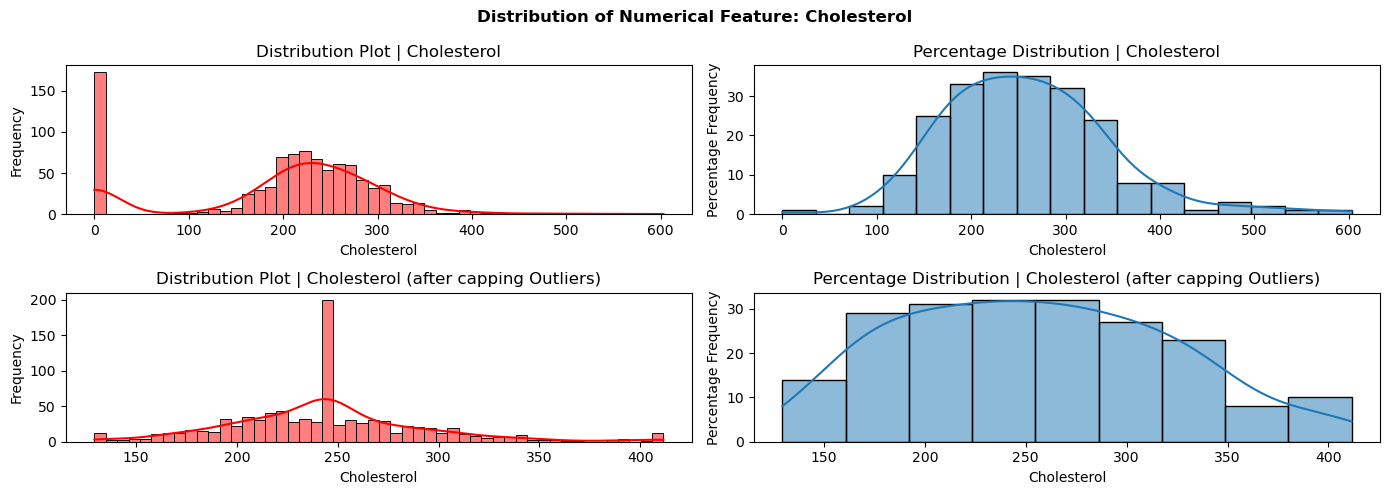

+-------------+---------------------------+--------------------------+
| Cholesterol | Before Capping (in mm/dl) | After Capping (in mm/dl) |
+-------------+---------------------------+--------------------------+
|    Mean     |           198.8           |          243.93          |
|    Mode     |             0             |          244.64          |
|  Std. dev.  |          109.38           |          48.91           |
+-------------+---------------------------+--------------------------+


In [16]:
## Cholesterol

plt.figure(1, figsize = (14,5))

plt.suptitle('Distribution of Numerical Feature: Cholesterol', fontweight = "bold")
plt.subplot(221)
sns.histplot(data = df, x = "Cholesterol",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Cholesterol")
plt.ylabel("Frequency")

plt.subplot(222)
df_temp = df['Cholesterol'].value_counts(normalize = True).reset_index()
df_temp.columns = ['Cholesterol', 'Percentage']
sns.histplot(data = df_temp, x = "Cholesterol",kde = True)
plt.title("Percentage Distribution | Cholesterol")
plt.ylabel("Percentage Frequency")

plt.subplot(223)
sns.histplot(data = df_no_outliers, x = "Cholesterol",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Cholesterol (after capping Outliers)")
plt.ylabel("Frequency")

plt.subplot(224)
df_temp = df_no_outliers['Cholesterol'].value_counts(normalize = True).reset_index()
df_temp.columns = ['Cholesterol', 'Percentage']
sns.histplot(data = df_temp, x = "Cholesterol",kde = True)
plt.title("Percentage Distribution | Cholesterol (after capping Outliers)")
plt.ylabel("Percentage Frequency")

plt.tight_layout()
plt.show()

## organizing the data in a list of lists

data = [
    ["Mean", round(df.Cholesterol.mean(),2), round(df_no_outliers.Cholesterol.mean(),2)],
    ["Mode", df.Cholesterol.mode()[0], df_no_outliers.Cholesterol.mode()[0]],
    ["Std. dev.", round(df.Cholesterol.std(),2), round(df_no_outliers.Cholesterol.std(),2)]
]

## defining column headers

headers = ["Cholesterol", "Before Capping (in mm/dl)", "After Capping (in mm/dl)"]

## creating the table using tabulate

table = tabulate(data, headers, tablefmt="pretty")

## printing the table

print(table)

###### Observations:
1. Most individuals have cholesterol levels between 200 and 300 mm/dl.
2. The mean cholesterol level is around 243.93 mm/dl, with a standard deviation of 48.91 mm/dl, and mode of 244.64 mm/dl.
3. The outliers impacted the distribution as a lot of patient's cholesterol level was wrongly marked as '**0**'.
4. After replacing and capping outliers, the distribution is somewhat skewed, with the ***mean ~ mode***. The distribution is not heavily skewed, as the mean is less than the mode by a small fraction, suggesting it is close to a normal distribution but somewhat skewed. The reason for the mean being less than the mode is the replacement of 0 values with mean values and the capping of outliers to the 1% to 99% range.

##### Maximum Heart Rate

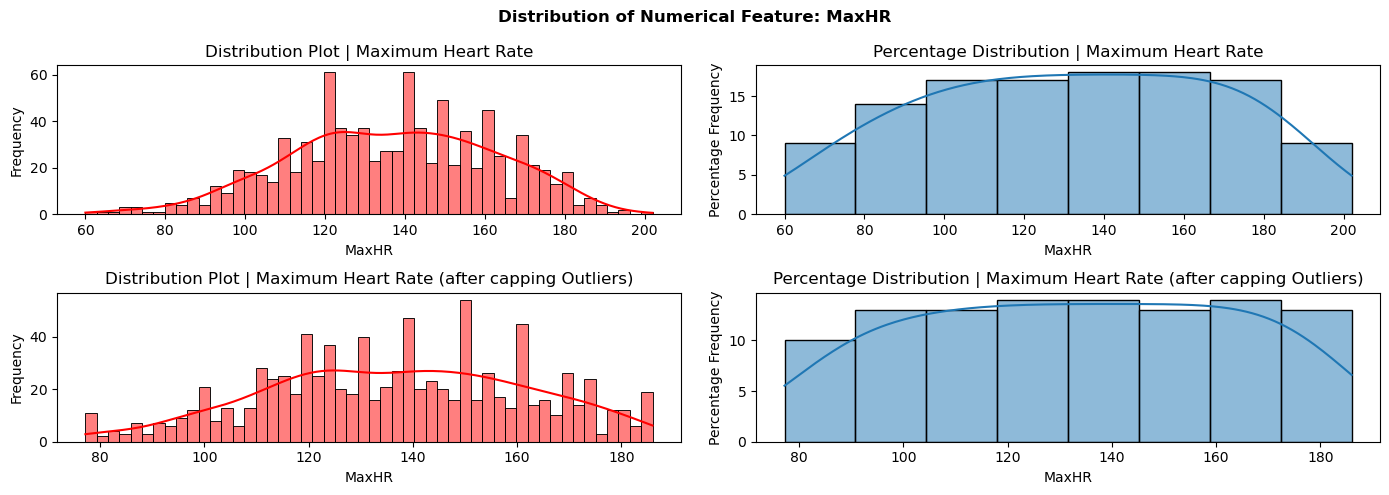

+--------------------+----------------+---------------+
| Maximum Heart Rate | Before Capping | After Capping |
+--------------------+----------------+---------------+
|        Mean        |     136.81     |    136.84     |
|        Mode        |      150       |     150.0     |
|     Std. dev.      |     25.46      |     25.12     |
+--------------------+----------------+---------------+


In [17]:
## Max HR

plt.figure(1, figsize = (14,5))

plt.suptitle('Distribution of Numerical Feature: MaxHR', fontweight = "bold")
plt.subplot(221)
sns.histplot(data = df, x = "MaxHR",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Maximum Heart Rate")
plt.ylabel("Frequency")

plt.subplot(222)
df_temp = df['MaxHR'].value_counts(normalize = True).reset_index()
df_temp.columns = ['MaxHR', 'Percentage']
sns.histplot(data = df_temp, x = "MaxHR",kde = True)
plt.title("Percentage Distribution | Maximum Heart Rate")
plt.ylabel("Percentage Frequency")

plt.subplot(223)
sns.histplot(data = df_no_outliers, x = "MaxHR",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Maximum Heart Rate (after capping Outliers)")
plt.ylabel("Frequency")

plt.subplot(224)
df_temp = df_no_outliers['MaxHR'].value_counts(normalize = True).reset_index()
df_temp.columns = ['MaxHR', 'Percentage']
sns.histplot(data = df_temp, x = "MaxHR",kde = True)
plt.title("Percentage Distribution | Maximum Heart Rate (after capping Outliers)")
plt.ylabel("Percentage Frequency")


plt.tight_layout()
plt.show()

## organizing the data in a list of lists

data = [
    ["Mean", round(df.MaxHR.mean(),2), round(df_no_outliers.MaxHR.mean(),2)],
    ["Mode", df.MaxHR.mode()[0], df_no_outliers.MaxHR.mode()[0]],
    ["Std. dev.", round(df.MaxHR.std(),2), round(df_no_outliers.MaxHR.std(),2)]
]

## defining column headers

headers = ["Maximum Heart Rate", "Before Capping", "After Capping"]

## creating the table using tabulate

table = tabulate(data, headers, tablefmt="pretty")

## printing the table

print(table)

###### Observation:
The majority of the individuals achieve a heart rate between 140 and 160 during a stress test. The mean heart rate achieved is approximately 149.65, with a standard deviation of 25.12, and a mode of 150. The results were not very impacted with outliers (results were closeby).

##### Oldpeak

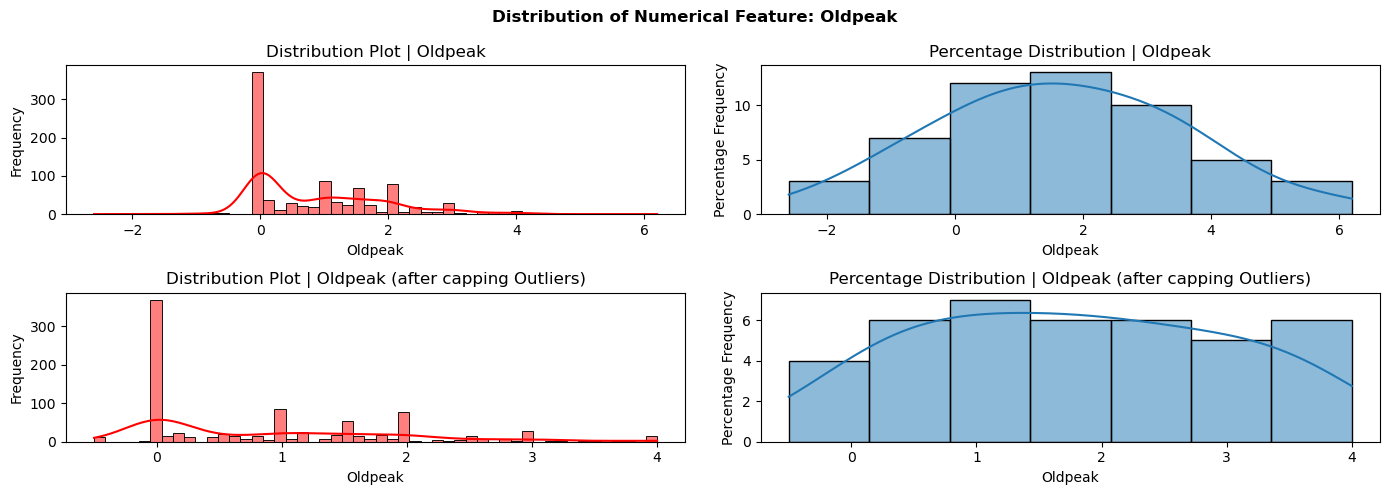

+-----------+----------------+---------------+
|  Oldpeak  | Before Capping | After Capping |
+-----------+----------------+---------------+
|   Mean    |      0.89      |     0.89      |
|   Mode    |      0.0       |      0.0      |
| Std. dev. |      1.07      |     1.03      |
+-----------+----------------+---------------+


In [18]:
## Oldpeak

plt.figure(1, figsize = (14,5))

plt.suptitle('Distribution of Numerical Feature: Oldpeak', fontweight = "bold")
plt.subplot(221)
sns.histplot(data = df, x = "Oldpeak",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Oldpeak")
plt.ylabel("Frequency")

plt.subplot(222)
df_temp = df['Oldpeak'].value_counts(normalize = True).reset_index()
df_temp.columns = ['Oldpeak', 'Percentage']
sns.histplot(data = df_temp, x = "Oldpeak",kde = True)
plt.title("Percentage Distribution | Oldpeak")
plt.ylabel("Percentage Frequency")

plt.subplot(223)
sns.histplot(data = df_no_outliers, x = "Oldpeak",kde = True, color = 'red', bins = 50)
plt.title("Distribution Plot | Oldpeak (after capping Outliers)")
plt.ylabel("Frequency")


plt.subplot(224)
df_temp = df_no_outliers['Oldpeak'].value_counts(normalize = True).reset_index()
df_temp.columns = ['Oldpeak', 'Percentage']
sns.histplot(data = df_temp, x = "Oldpeak",kde = True)
plt.title("Percentage Distribution | Oldpeak (after capping Outliers)")
plt.ylabel("Percentage Frequency")


plt.tight_layout()
plt.show()

## organizing the data in a list of lists

data = [
    ["Mean", round(df.Oldpeak.mean(),2), round(df_no_outliers.Oldpeak.mean(),2)],
    ["Mode", df.Oldpeak.mode()[0], df_no_outliers.Oldpeak.mode()[0]],
    ["Std. dev.", round(df.Oldpeak.std(),2), round(df_no_outliers.Oldpeak.std(),2)]
]

## defining column headers

headers = ["Oldpeak", "Before Capping", "After Capping"]

## creating the table using tabulate

table = tabulate(data, headers, tablefmt="pretty")

## printing the table

print(table)

###### Observations:
1. Most of the values are concentrated towards 0, indicating that many individuals did not experience significant ST depression during exercise.
2. The mean ST depression value is 0.89, with a standard deviation of 1.03, and a mode of 0.
3. The results were not very impacted with outliers (results were closeby).

#### Categorical Columns

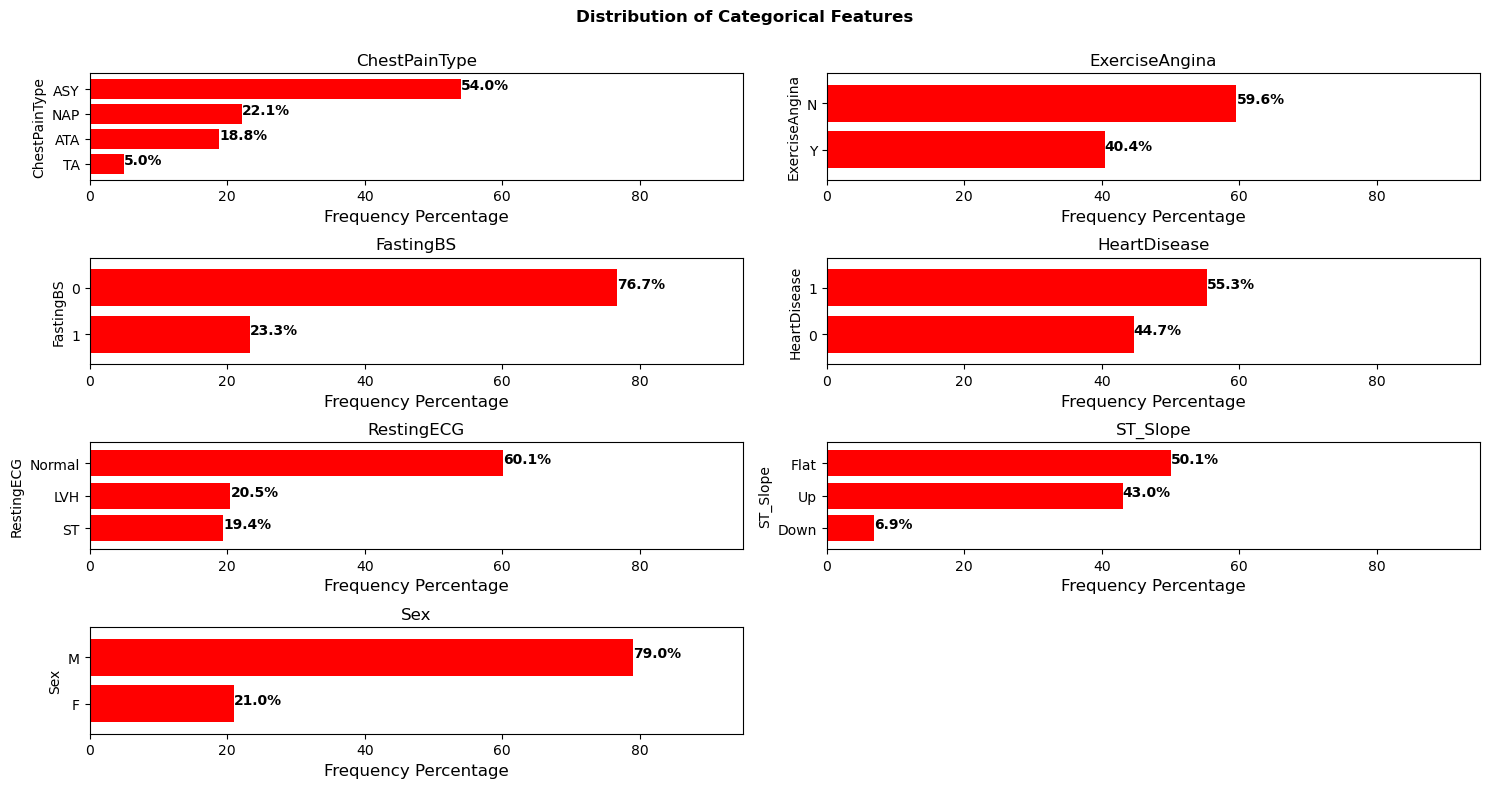

In [19]:
## identifying categorical columns (before capping outliers)

numerical_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical_features = df.columns.difference(numerical_features).sort_values()
df_categorical = df[categorical_features]

## calculating the number of rows needed for subplots

num_plots = len(categorical_features)
num_rows = (num_plots + 1) // 2  # Ensures we have enough rows

## setting up the subplot for the layout

fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 2 * num_rows))

## flattening the ax array for easy indexing if necessary

if num_rows == 1:
    ax = ax[np.newaxis, :]  # Ensure ax is 2D

## loop to plot bar charts for each categorical feature

for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    ## frequency percentages
    
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    ## bar chart
    
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    ## adding frequency percentages to the bars
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=10, weight='bold')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}')

## hiding any unused subplots

for j in range(i + 1, num_rows * 2):
    row = j // 2
    col_idx = j % 2
    ax[row, col_idx].axis('off')

plt.suptitle('Distribution of Categorical Features', fontweight = "bold")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

###### Observations:
1. **ChestPainType:** The dataset shows varied chest pain types among patients. Type **ASY** (Asymptomatic) seems to be the most prevalent - 54.03%, followed by **NAP** (Non-Anginal Pain) - 22.11%, **ATA** (Atypical Angina) - 18.85%, and **TA** (Typical Angina) - 5.01%.
2. **ExerciseAngina:** A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset, **59.59%** **NO** over **40.41%** **YES**.
3. **FastingBS:** A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.
4. **HeartDisease:** The dataset is nearly balanced in terms of heart disease presence, with about 55.34% having it and 44.66% not having it.
5. **RestingECG:** The results show varied resting electrocardiographic outcomes, with certain types being more common than others, that is, 60.13% being **Normal**, 20.48% **LVH** (showing probable or definite left ventricular hypertrophy by Estes' criteria), and 19.39% **ST** {having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)}.
6. **ST_Slope:** The dataset shows different slopes of the peak exercise ST segment, **Flat** being 50.11%, **Up** being 43.03% and **Down**(downsloping) being 6.86%.
7. **Sex:** The dataset is predominantly **males** (78.98%), constituting a significant majority over **females** (21.02%).

 ### Bivariate Analysis

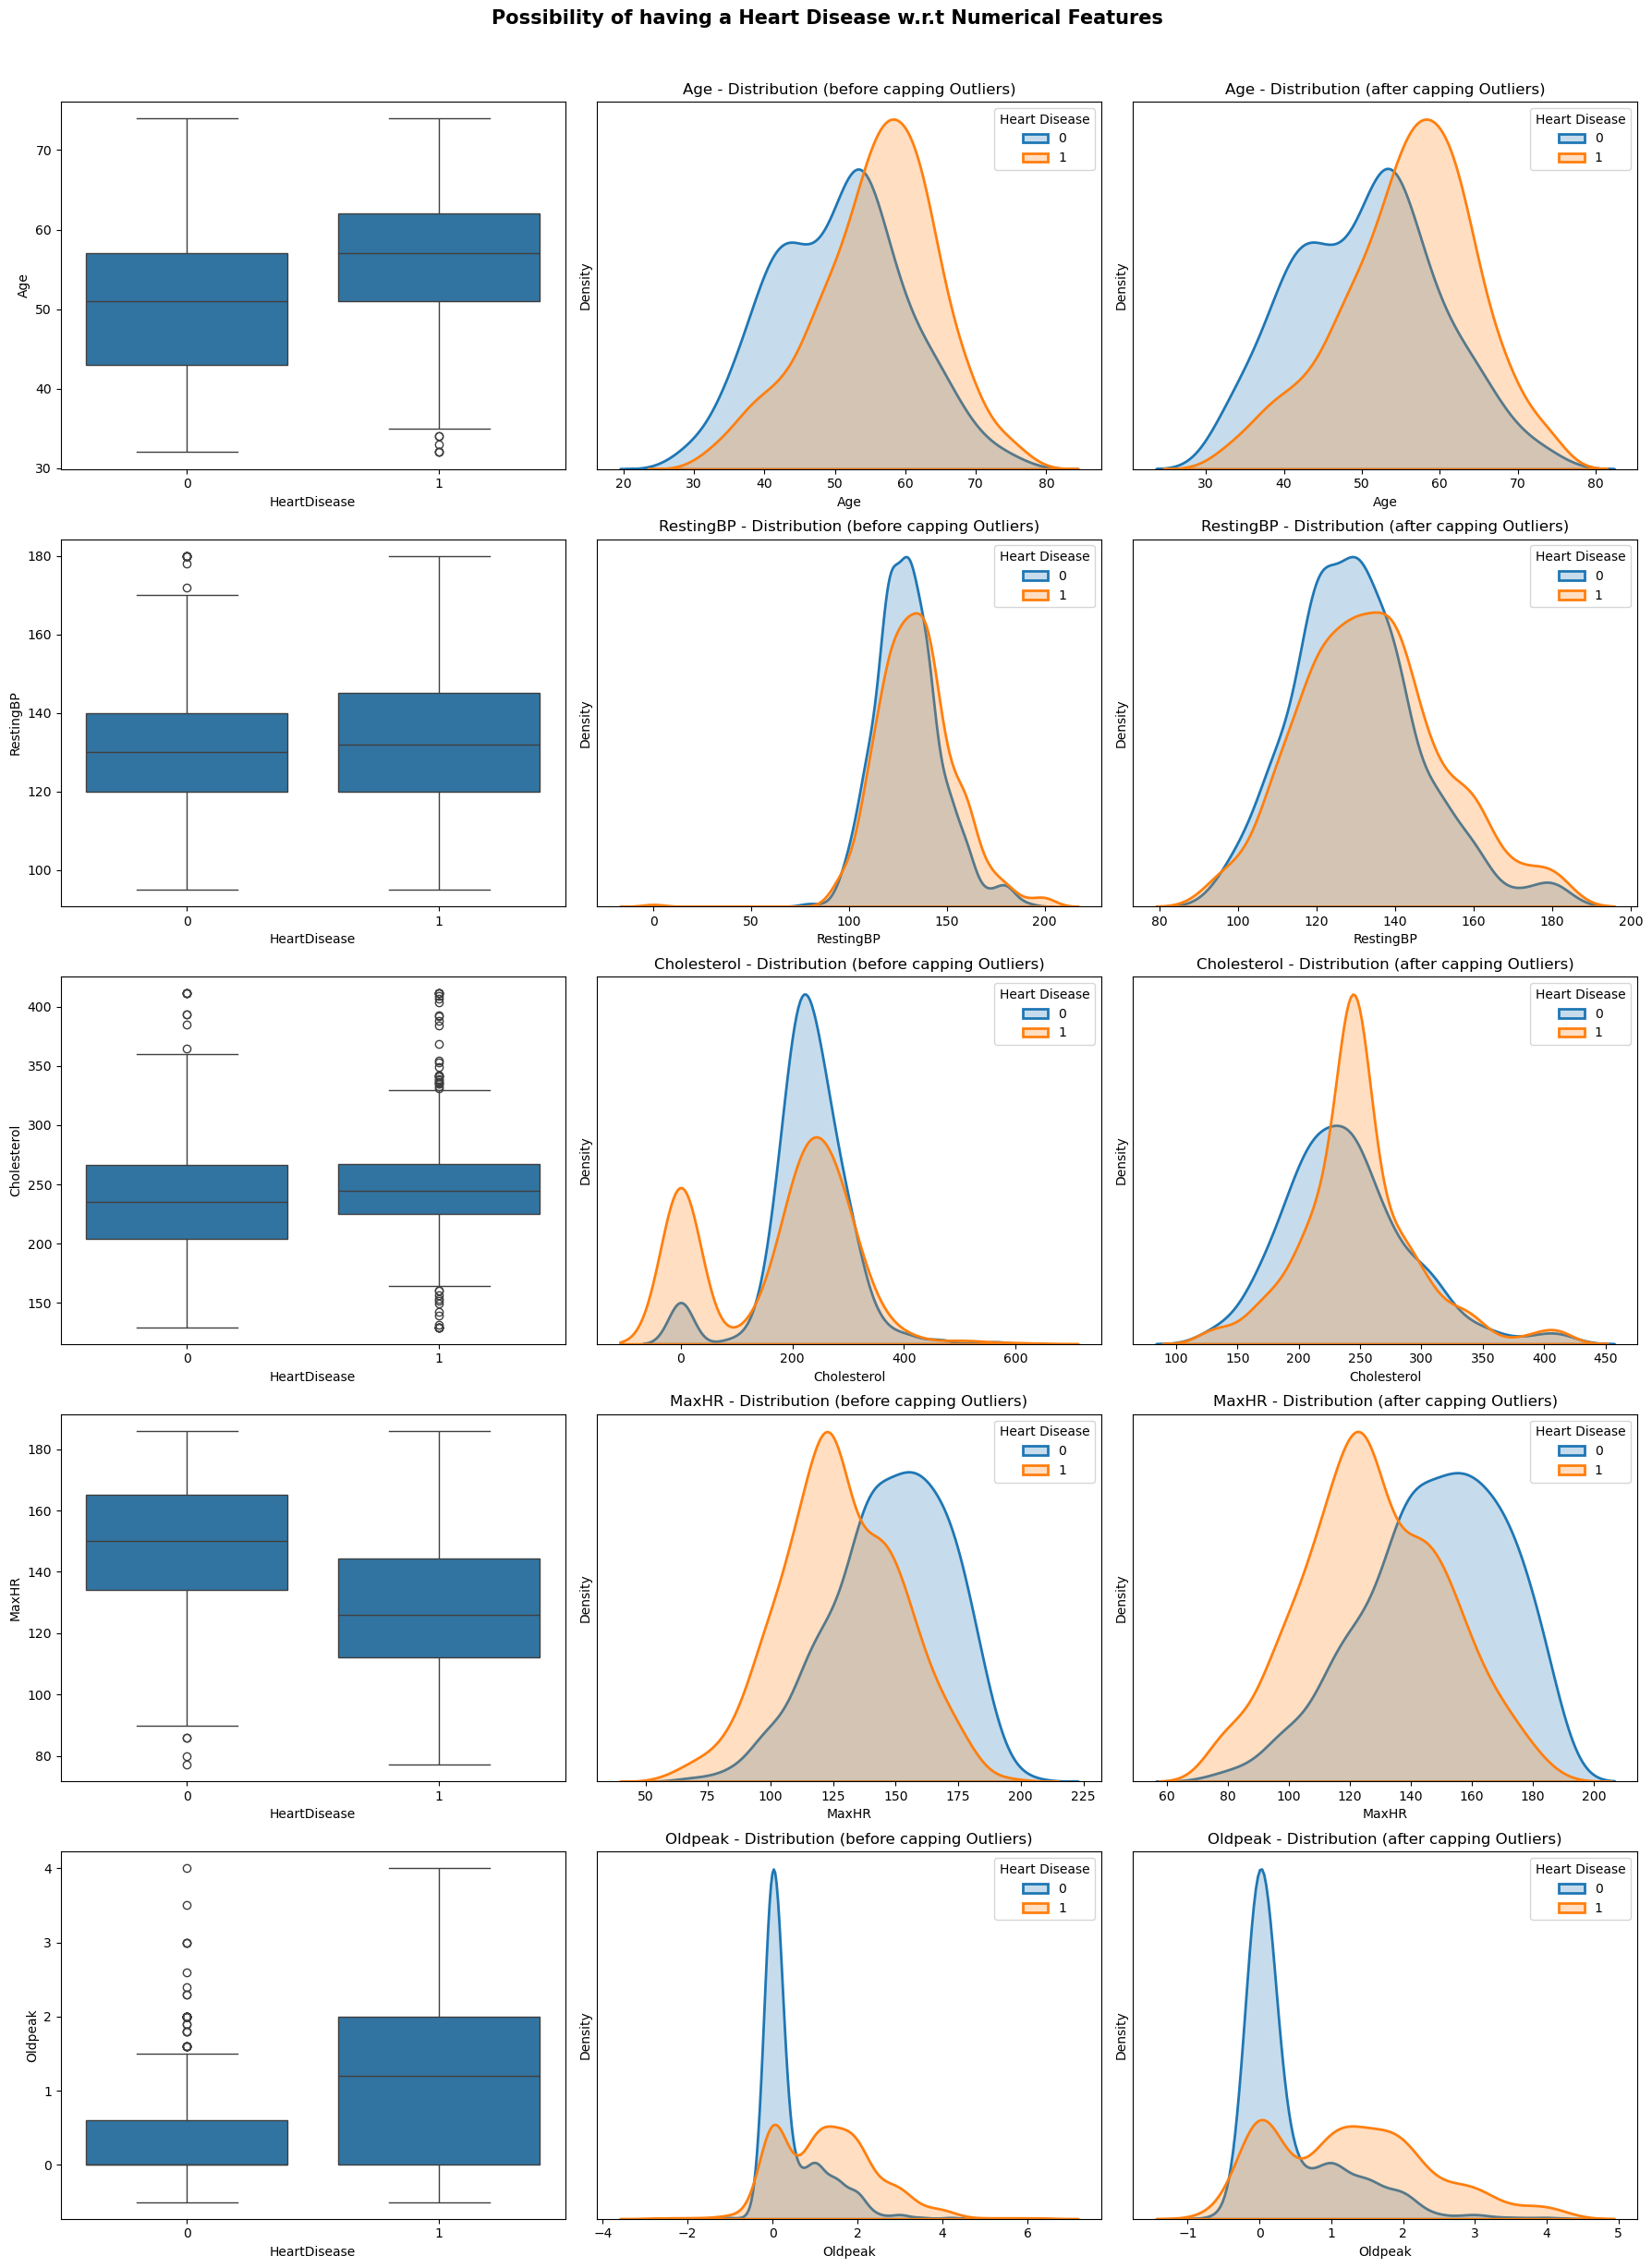

In [20]:
## finding number of rows needed for subplots (3 per feature)
num_plots = len(numerical_features) * 3
num_rows = len(numerical_features)

## setting up the subplot for the layout

fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 5 * num_rows))

## flatenning the ax array for easy indexing if necessary

ax = ax.flatten()

## plotting bar charts and KDE plots for each numerical feature
##  for each numerical feature mentioned in list numerical_features

for i, col in enumerate(numerical_features):
    
    ## plotting mean value of the feature for each target category
    
    graph = sns.boxplot(data=df_no_outliers, x="HeartDisease", y=col, ax=ax[i*3])
    
    ## KDE plot showing the distribution of the feature for each target category in the original DataFrame
    
    sns.kdeplot(data=df[df["HeartDisease"]==0], x=col, fill=True, linewidth=2, ax=ax[i*3+1], label='0')
    sns.kdeplot(data=df[df["HeartDisease"]==1], x=col, fill=True, linewidth=2, ax=ax[i*3+1], label='1')
    ax[i*3+1].set_yticks([])
    ax[i*3+1].legend(title='Heart Disease', loc='upper right')
    ax[i*3+1].set_title(f'{col} - Distribution (before capping Outliers)')
    
    ## KDE plot showing the distribution of the feature for each target category in the DataFrame with capped outliers
    
    sns.kdeplot(data=df_no_outliers[df_no_outliers["HeartDisease"]==0], x=col, fill=True, linewidth=2, ax=ax[i*3+2], label='0')
    sns.kdeplot(data=df_no_outliers[df_no_outliers["HeartDisease"]==1], x=col, fill=True, linewidth=2, ax=ax[i*3+2], label='1')
    ax[i*3+2].set_yticks([])
    ax[i*3+2].legend(title='Heart Disease', loc='upper right')
    ax[i*3+2].set_title(f'{col} - Distribution (after capping Outliers)')

## hiding any unused subplots

for j in range(len(numerical_features) * 3, num_rows * 3):
    ax[j].axis('off')

plt.suptitle('Possibility of having a Heart Disease w.r.t Numerical Features', fontsize = 15, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
print("\n")
plt.show()

###### Obsevations:
1. **Age:** The distributions show a slight shift with patients having heart disease being a bit older on average than those without. The mean age for patients without heart disease is lower.
2. **RestingBP:** Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.
3. **Cholesterol:** A number of records (172) showed 0 cholesterol which is not possible, thus, the mean of cholesterol level for patient's having heart disease showed less than patients who do not have. The fact was cleared when 0 values were replaced by mean values and hence, the mean of cholesterol level of patients having heart disease came out to be higher than those without, indicating a higher cholesterol level have higher probability of having a heart disease.
4. **MaxHR:** There's a noticeable difference in distributions. Patients without heart disease tend to achieve a higher maximum heart rate during stress tests compared to those with heart disease which is different to real-life anomaly.
5. **Oldpeak:** The ST depression induced by exercise relative to rest is notably lower for patients without heart disease. Their distribution peaks near zero, whereas the disease category has a wider spread with a mean around 0.

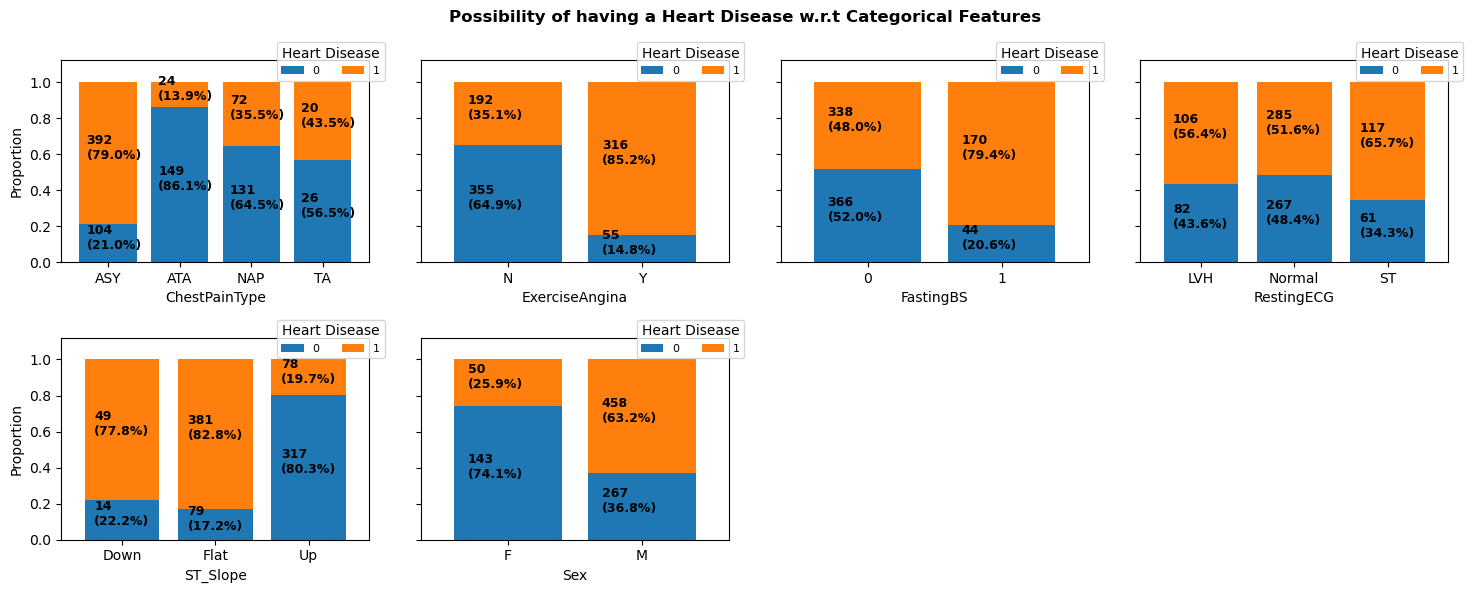

In [21]:
categorical_features = [feature for feature in categorical_features if feature != 'HeartDisease']

fig, ax = plt.subplots(nrows = 2, ncols=4, figsize=(15,6))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['HeartDisease'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['HeartDisease'], normalize='index')
    
    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'{count}\n({np.round(proportion * 100, 1)}%)',color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Heart Disease', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
# Hide any unused subplots
for j in range(len(categorical_features), len(ax.flatten())):
    ax[j//4,j%4].axis('off')
    
            
plt.suptitle('Possibility of having a Heart Disease w.r.t Categorical Features', fontsize = 12, fontweight='bold')
plt.tight_layout()                     
plt.show()

###### Observations:
1. **ChestPainType:** Different types of chest pain present varied proportions of heart disease. Notably, type *ASY* has quite a higher proportion of heart disease presence compared to type *TA*, followed by *NAP*, and *ATA*. This suggests the type of chest pain can be influential in predicting the disease.
2. **ExerciseAngina:** Patients who did experience exercise-induced angina (0) show a higher proportion of heart disease presence compared to those who did not (1). This feature seems to have a significant impact on the target.
3. **FastingBS:** The possibility of having heart disease for those having fasting blood sugar > 120 mg/dl (1) is relatively higher than thise having blood sugar < 120 mg/dl (0), suggesting FastingBS impacts heart disease prediction.
4. **RestingECG:** Type *ST* (having ST-T wave abnormality) displays a higher proportion of heart disease presence, indicating that this feature as a significant predictor of the outcome compared to *LVH* and *Normal*.
5. **ST_Slope:** Type *Flat* and type *Down*(Downsloping) acts as significant indicators of heart disease while type Up does not have much influence on heart disease.
6. **Sex:** Males (M) exhibit a higher proportion of heart disease presence compared to females (F). This indicates gender as an influential factor in predicting heart disease.

### Multivariate Analysis

#### Age

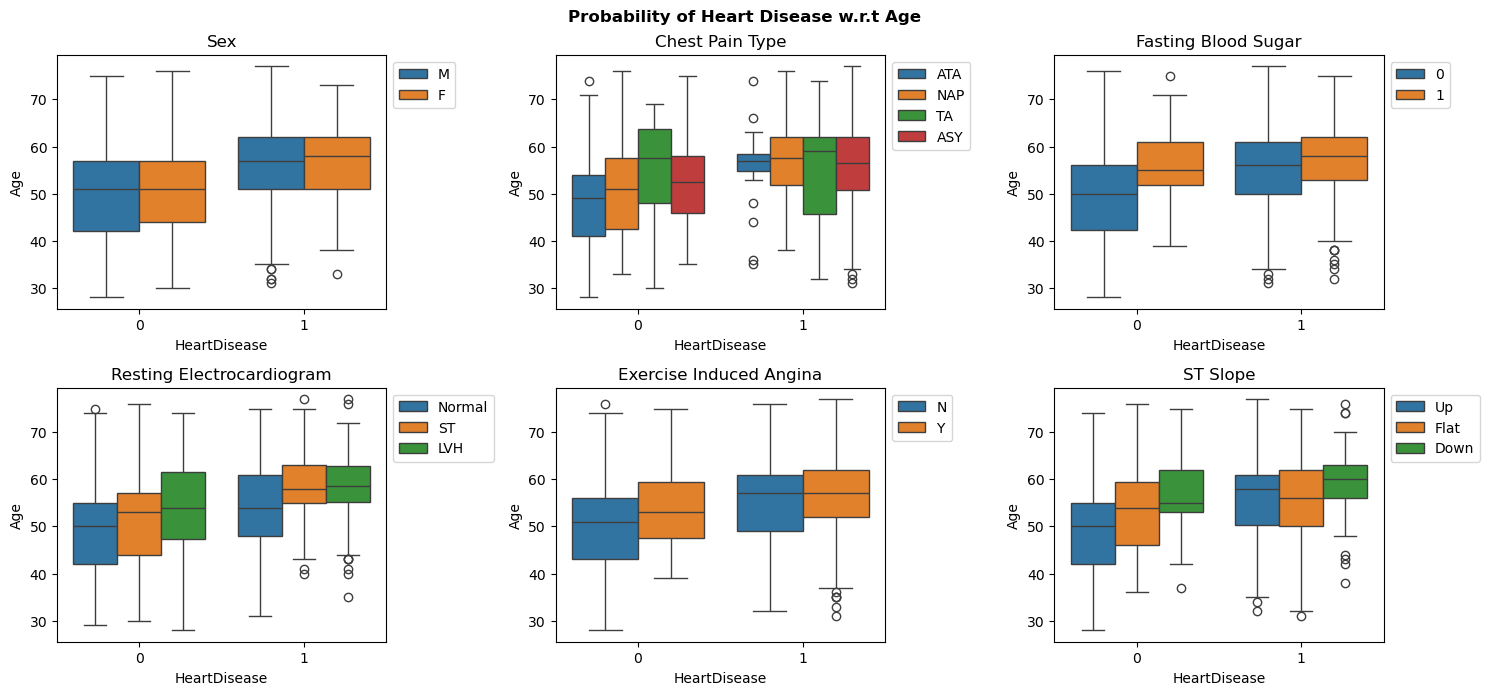

In [22]:
## heart disease probability as per age

plt.figure(1,figsize = (15,10))

## wrt sex

plt.subplot(331)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "Sex")
plt.title("Sex", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Chest Pain Type

plt.subplot(332)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "ChestPainType")
plt.title("Chest Pain Type", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Fasting Blood Sugar

plt.subplot(333)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "FastingBS")
plt.title("Fasting Blood Sugar", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Resting Electrocardiogram

plt.subplot(334)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "RestingECG")
plt.title("Resting Electrocardiogram", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Exercise Angina

plt.subplot(335)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "ExerciseAngina")
plt.title("Exercise Induced Angina", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt ST_Slope

plt.subplot(336)
sns.boxplot(data = df, x = "HeartDisease", y = "Age", hue = "ST_Slope")
plt.title("ST Slope", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.suptitle("Probability of Heart Disease w.r.t Age", fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

###### Observations:
1. **Sex:**
* Both males and females tend to develop heart disease at an older age. The mean age of individuals with heart disease is higher than that of those without heart disease. Therefore, age alone may not be a reliable predictor for differentiating between males and females.
2. **Chest Pain Types (ChestPainType):**
* For chest pain type ATA, the age spectrum difference between individuals with disease is smaller and without is larger.
* For chest pain types NAP and ASY, the age spectrum difference between individuals with and without heart disease is similar.
* Individuals with heart disease and chest pain type ASY have a lower mean age compared to those with chest pain types NAP and ATA, while individuals without heart disease and chest pain type ASY have a higher mean age compared to those with chest pain types NAP and ATA.
* For chest pain type TA, although the age spectrum difference is the same, most individuals with heart disease fall below the mean age. Thus, age alone may not be a reliable predictor for chest pain type TA.



3. **Fasting Blood Sugar (FastingBS):**
* People with heart disease tend to have higher fasting bs (>120 mg/dl) at an older age (mean around 54-58 years) compared to those without heart disease (mean around 50-56 years).
* Individuals with fasting bs >120 mg/dl are observed to be older than those with fasting bs <= 120 mg/dl.
4. **Resting Electrocardiogram (RestingECG):**
* The age spectrum difference in resting ECG types (LVH and ST) is smaller for individuals with heart disease compared to those without heart disease.
* For normal resting ECG, the age spectrum difference is similar between the two groups.
* The mean age of individuals with heart disease is higher across all resting ECG types.
5. **Exercise Induced Angina (ExerciseAngina):**
* The mean age of individuals with heart disease is approximately the same for those with and without exercise-induced angina. Therefore, exercise-induced angina may not significantly impact the presence of heart disease.
* Individuals without heart disease tend to have a lower mean age compared to those with heart disease.
* It is difficult to predict heart disease on the basis of mean age as for both having exercise induced angina and ones not having exercise induced angina are same.
6. **ST Slope (ST_Slope):**
* The mean age of individuals with heart disease differs significantly based on the ST slope.
* For ST slope Up and Down, the mean age is higher for individuals with heart disease compared to those without.
* For ST slope Flat, the difference in mean age between the two groups is not very significant.
* Additionally, individuals with heart disease and ST_Slope Flat have a lower mean age than those with ST_Slope Up, while individuals without heart disease and ST_Slope Flat show a higher mean age than those with ST_Slope Up.

#### RestingBP

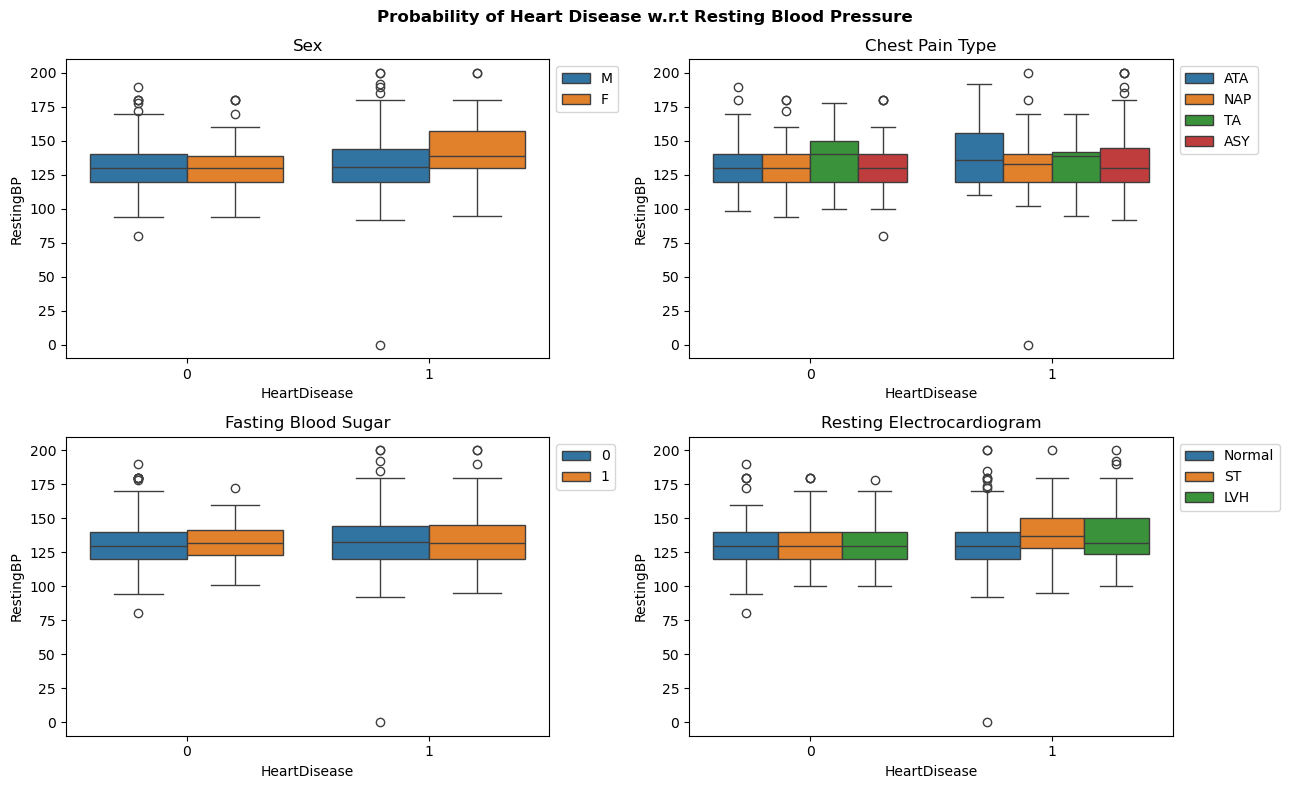

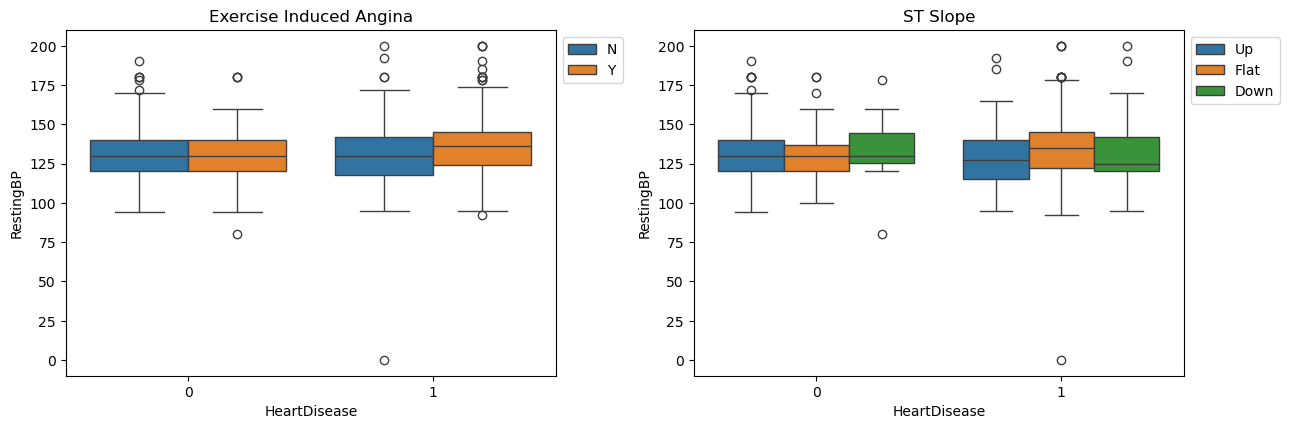

In [23]:
## heart disease probability as per resting blood pressure ('RestingBP')

plt.figure(1,figsize = (13,8))

## wrt sex

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "Sex")
plt.title("Sex", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Chest Pain Type

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "ChestPainType")
plt.title("Chest Pain Type", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Fasting Blood Sugar

plt.subplot(223)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "FastingBS")
plt.title("Fasting Blood Sugar", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Resting Electrocardiogram

plt.subplot(224)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "RestingECG")
plt.title("Resting Electrocardiogram", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.suptitle("Probability of Heart Disease w.r.t Resting Blood Pressure", fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (13,8))

## wrt Exercise Angina

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "ExerciseAngina")
plt.title("Exercise Induced Angina", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt ST_Slope

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "RestingBP", hue = "ST_Slope")
plt.title("ST Slope", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### Observations:
1. **Sex:**
* Females and Males having heart disease, show a significant difference in their age means with females higher than males. On the other side, people without heart disease, the average age means are same for resting bp.
2. **Chest Pain Types (ChestPainType):**
* For chest pain type ATA, people having heart disease have their resting BP mean higher than chest pain type ASY, but lower than chest pain type ATA. The average of the three in case people do not have a heart disease show around the same resting bp mean.
* For chest pain type TA, people having heart disease have a lower resting BP mean compared to people who do not have a heart disease, this is opposite in the other 3 chest pain types (ATA, NAP, and ASY).
3. **Fasting Blood Sugar (FastingBS):**
* It is difficult to predict heart disease for people with Fasting BS and Resting BP and the means follow the same order.
4. **Resting Electrocardiogram (RestingECG):**
* For ST resting ecg, the resting bp mean is higher for people with heart disease compared to people who don't have a heart disease. It is higher than both Normal and LVH resting ECG for people having heart disease.
* For LVH resting ecg, the resting bp mean is slightly higher for people with heart disease compared to people who don't have a heart disease, but the difference is not significant.
* For normal resting ECG, the mean age in both cases is same, and hence, heart disease can not be predicted in this case.
* The mean resting bp of individuals without heart disease for all resting ecg types.
5. **Exercise Induced Angina (ExerciseAngina):**
* For people who don't have exercise induced angina, it is difficult to predict heart disease based on resting bp.
* For people who have exercise induced angina, the mean of resting bp is higher for people with heart disease compared to people who don't have a heart disease.
6. **ST Slope (ST_Slope):**
* For ST_Slope Up and Down, the mean resting bp is lower for individuals with heart disease compared to those without.
* For ST_Slope Flat, the mean resting bp is higher for individuals with heart disease compared to those without.
* ST_Slope Flat of people having heart diesase has higher resting BP mean compared to Up and Down ST_Slope, while it is same as the other two for people not having heart disease.

#### Cholesterol

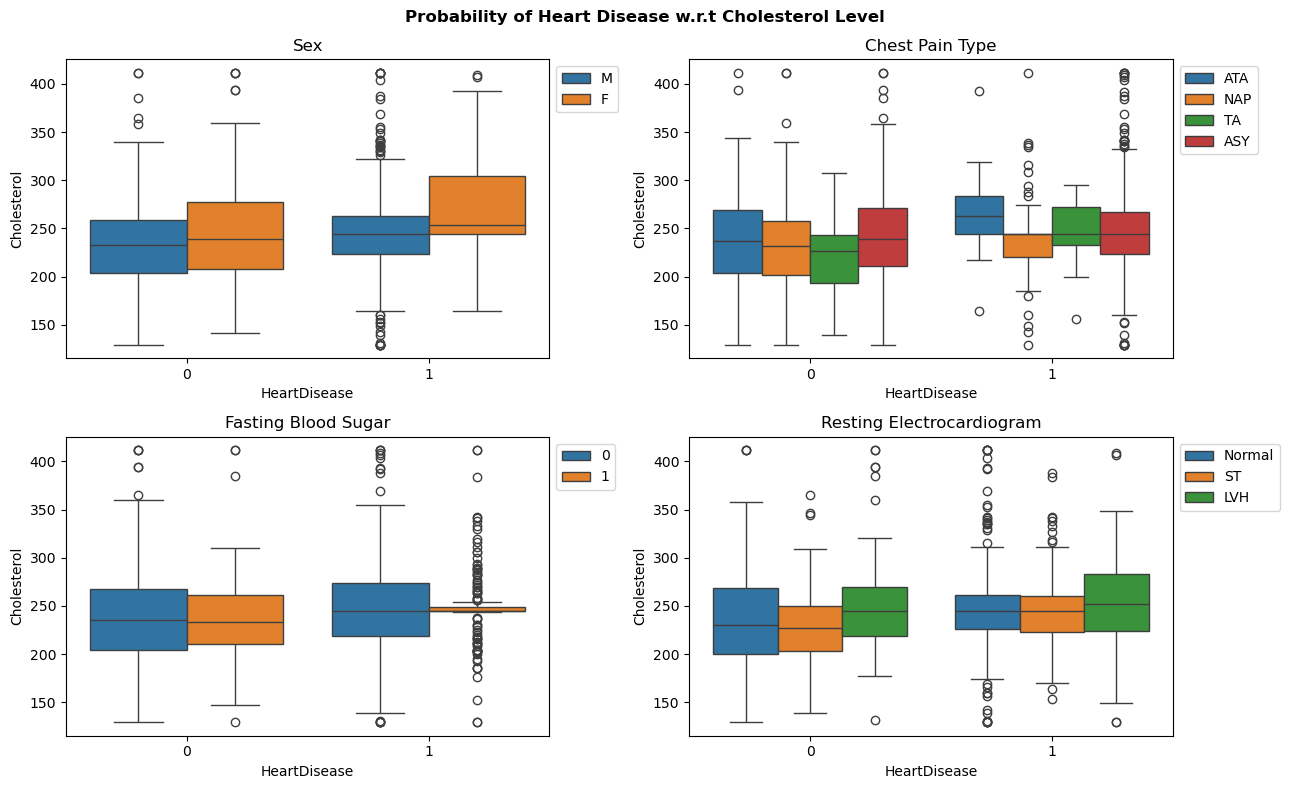

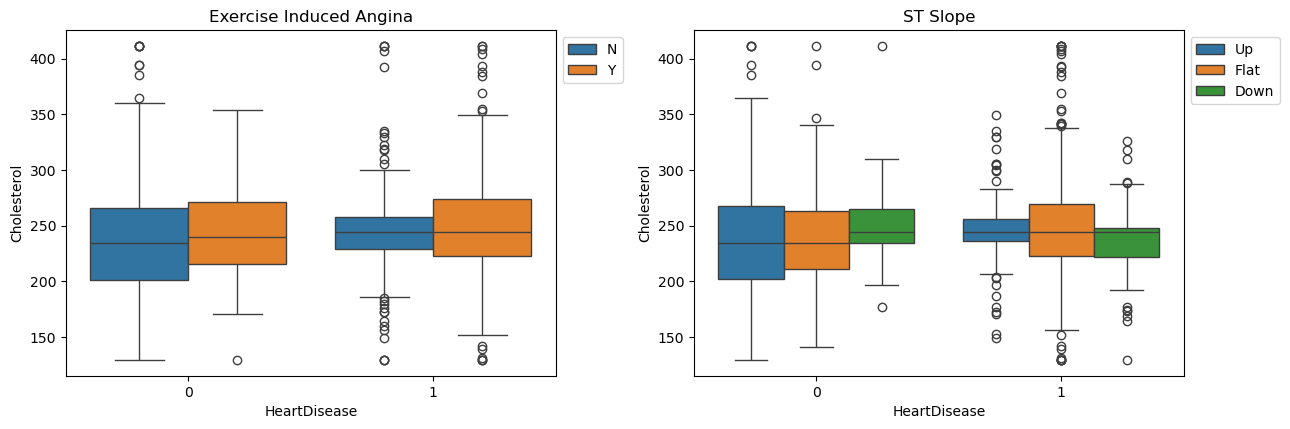

In [24]:
## heart disease probability as per Cholesterol

plt.figure(1,figsize = (13,8))

## wrt sex

plt.subplot(221)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "Sex")
plt.title("Sex", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Chest Pain Type

plt.subplot(222)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "ChestPainType")
plt.title("Chest Pain Type", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Fasting Blood Sugar

plt.subplot(223)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "FastingBS")
plt.title("Fasting Blood Sugar", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Resting Electrocardiogram

plt.subplot(224)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "RestingECG")
plt.title("Resting Electrocardiogram", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.suptitle("Probability of Heart Disease w.r.t Cholesterol Level", fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (13,8))

## wrt Exercise Angina

plt.subplot(221)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "ExerciseAngina")
plt.title("Exercise Induced Angina", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt ST_Slope

plt.subplot(222)
sns.boxplot(data = df_no_outliers, x = "HeartDisease", y = "Cholesterol", hue = "ST_Slope")
plt.title("ST Slope", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### Observations:
1. **Sex:**
* Both males and females having higher cholesterol level have higher chance of having a heart disease.
2. **Chest Pain Types (ChestPainType):**
* For all chest pain types, people with higher cholesterol level have higher chance of having a heart disease with a clear distinction for ATA chest pain type where the cholesterol level spectrum is also smaller for people having a heart disease.
* People with heart disease having chest pain type ASY, have lower Cholesterol level mean compared to ATA (while it is higher for people not having heart disease) and almost similar to people with chest pain type TA (while it is higher for people not having heart disease).
3. **Fasting Blood Sugar (FastingBS):**
* People with fasting bs level > 120 mg/dl have a higher cholesterol level when they have a heart disease compared to when they have fasting bs level <= 120 mg/dl. It is difficult to predict heart disease in this aspect.
4. **Resting Electrocardiogram (RestingECG):**
* The mean cholesterol level of individuals with heart disease is higher across all resting ECG types.
* The mean cholesterol level for people having a heart disease is almost same in ST and Normal ECG types, while for people who do not have a heart disease the mean cholesterol level for people with ST ECG type is higher than Normal ECG type.
5. **Exercise Induced Angina (ExerciseAngina):**
* People with exercise induced angina and heart disease have almost same cholesterol level mean as people who don't have exercise induced angina.
* In case of people who do not have heart disease, the exercise induced angina people have slightly higher cholesterol level mean.
* The cholesterol level spectrum for people who do not have an exercise induced angina, and having a heart disease is small, and can be a significant predictor of having heart disease.
6. **ST Slope (ST_Slope):**
* For down (down sloping) ST_Slope, it is difficult to predict heart disease based on Cholesterol level.
* For both flat and up ST_slope, people with heart disease have higher cholesterol level mean compared to people who don't have a heart disease.
* For people having heart disease, the mean cholesterol level is almost same in all ST_Slope types.
* For people not having heart disease, the mean cholesterol level of down ST_Slope is higher than other two.

#### MaxHR

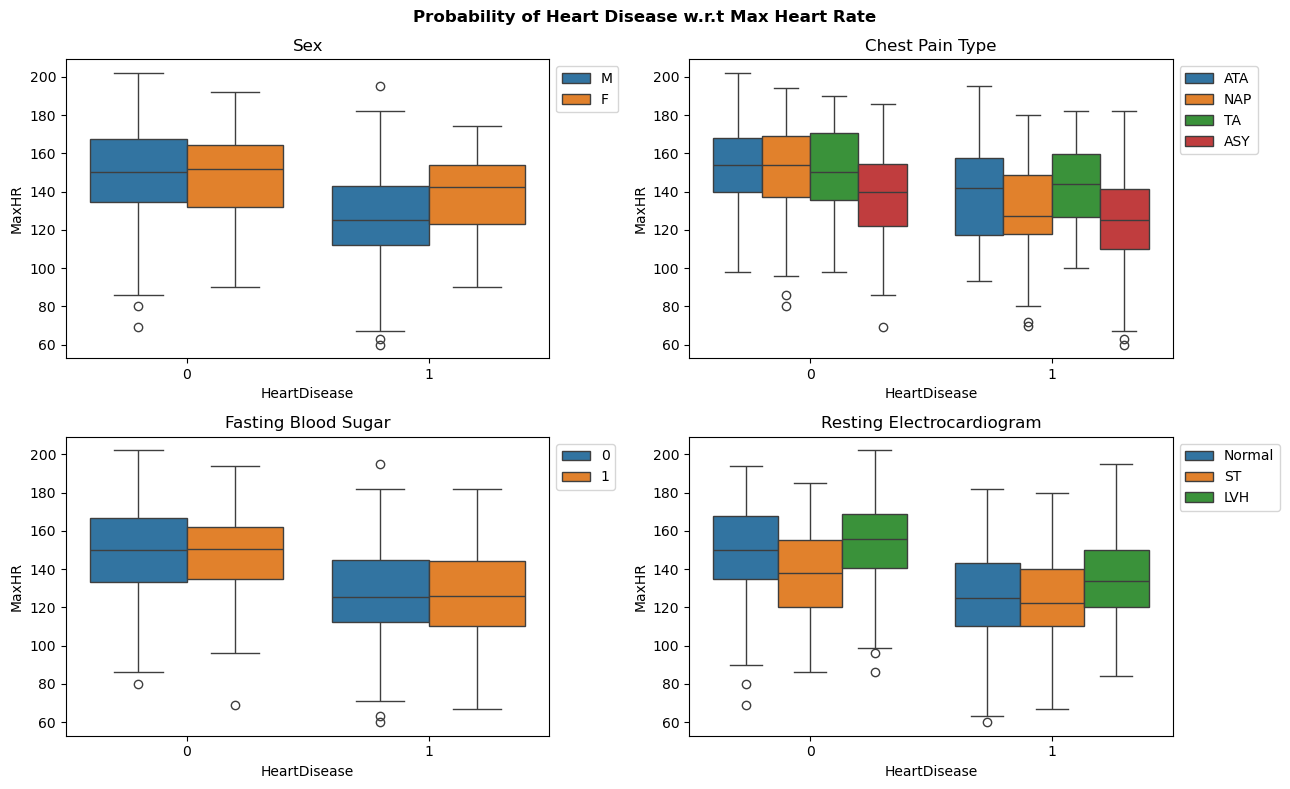

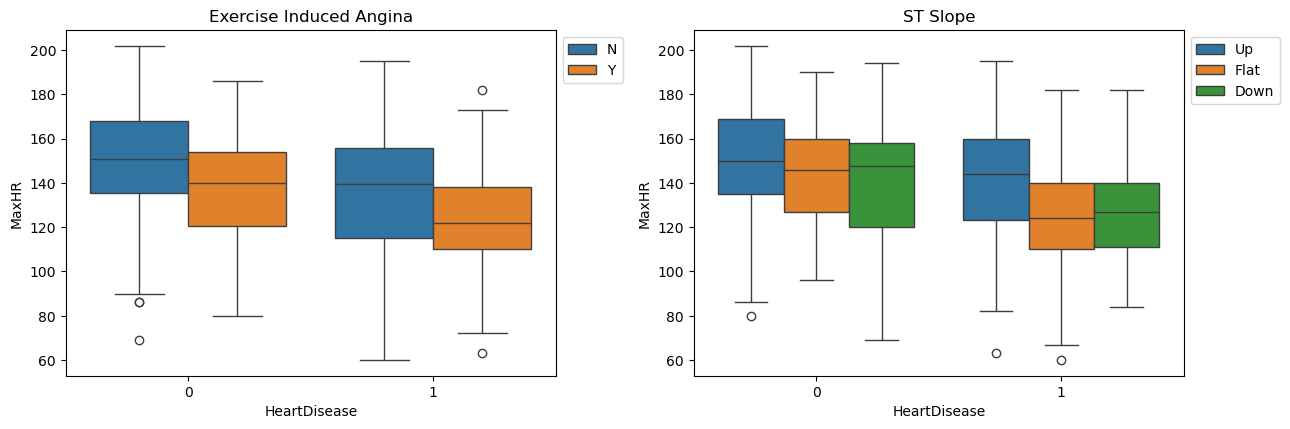

In [25]:
## heart disease probability as per MaxHR (a.k.a Maximum Heart Rate)

plt.figure(1,figsize = (13,8))

## wrt sex

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "Sex")
plt.title("Sex", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Chest Pain Type

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "ChestPainType")
plt.title("Chest Pain Type", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Fasting Blood Sugar

plt.subplot(223)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "FastingBS")
plt.title("Fasting Blood Sugar", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Resting Electrocardiogram

plt.subplot(224)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "RestingECG")
plt.title("Resting Electrocardiogram", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.suptitle("Probability of Heart Disease w.r.t Max Heart Rate", fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (13,8))

## wrt Exercise Angina

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "ExerciseAngina")
plt.title("Exercise Induced Angina", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt ST_Slope

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "MaxHR", hue = "ST_Slope")
plt.title("ST Slope", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### Observations:
1. **Sex:**
* Males who don't have a heart disease have a slightly lower maximum heart rate mean compared to females while the difference is significant in case of people with heart disease.
2. **Chest Pain Types (ChestPainType):**
* For all chest pain types, people with lower maximum heart rate mean have higher chance of having a heart disease.
* For chest pain type NAP, the mean maximum heart rate is lower (in people having heart disease) than chest pain types ATA and TA, while it is almost same as ATA chest pain type, and higher than chest pain type TA for people who do not have a heart disease.
3. **Fasting Blood Sugar (FastingBS):**
* It is difficult to seperate people with fasting bs > 120 mg/dl and <= 120 mg/dl for heart disease prediction as in both cases the maximum heart rate means follow the same order.
4. **Resting Electrocardiogram (RestingECG):**
* It is difficult to seperate people on basis of resting ecg for heart disease prediction as in all 3 cases the maximum heart rate means follow the same order.
5. **Exercise Induced Angina (ExerciseAngina):**
* For people who have a heart disease, the difference between the maximum heart rate of people having exercise induced angina and not having exercise induced angina is slightly more significant compared to in people who do not have a heart disease.
6. **ST Slope (ST_Slope):**
* It is difficult to seperate people on basis of ST_Slope for heart disease prediction as in all 3 cases the maximum heart rate means follow the same order.

#### Oldpeak

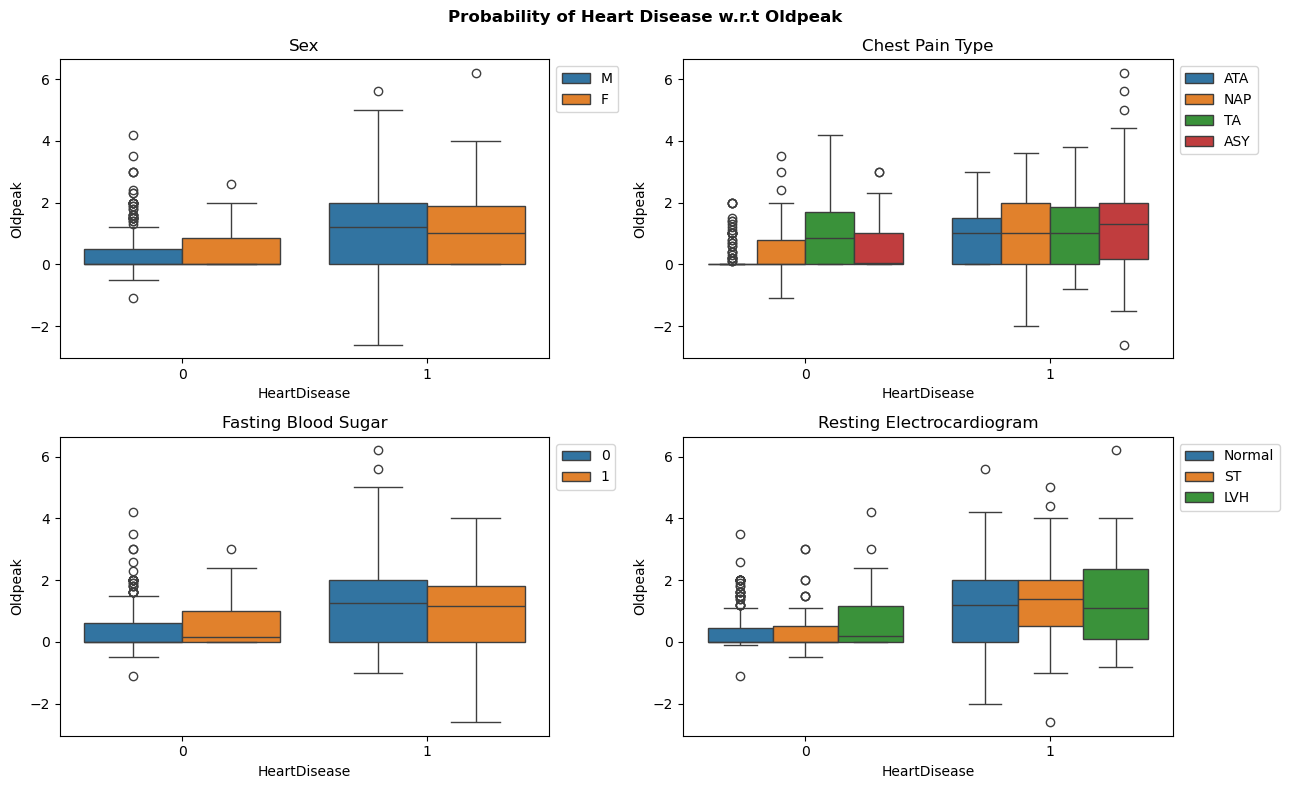

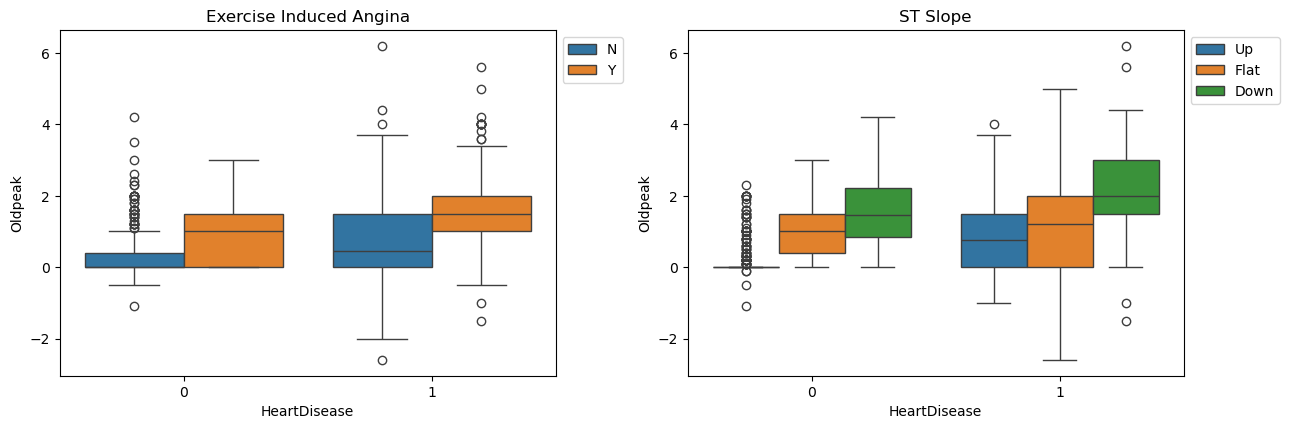

In [26]:
## heart disease probability as per Oldpeak

plt.figure(1,figsize = (13,8))

## wrt sex

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "Sex")
plt.title("Sex", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Chest Pain Type

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "ChestPainType")
plt.title("Chest Pain Type", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Fasting Blood Sugar

plt.subplot(223)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "FastingBS")
plt.title("Fasting Blood Sugar", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt Resting Electrocardiogram

plt.subplot(224)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "RestingECG")
plt.title("Resting Electrocardiogram", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.suptitle("Probability of Heart Disease w.r.t Oldpeak", fontsize = 12, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(2,figsize = (13,8))

## wrt Exercise Angina

plt.subplot(221)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "ExerciseAngina")
plt.title("Exercise Induced Angina", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

## wrt ST_Slope

plt.subplot(222)
sns.boxplot(data = df, x = "HeartDisease", y = "Oldpeak", hue = "ST_Slope")
plt.title("ST Slope", fontsize = 12)
plt.legend(prop = {'size' : 10}, fontsize = 3, markerscale = 0.5, labelspacing=0.5, bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

###### Observations:
1. **Sex:**
* Females who have a heart disease have a slightly lower oldpeak level mean compared to males while there is almost no difference in case of people who don't have a heart disease.
2. **Chest Pain Types (ChestPainType):**
* For all chest pain types, people with higher oldpeak level mean have higher chance of having a heart disease.
* For chest pain type ASY, the mean oldpeak level is higher (in people having heart disease) than chest pain type TA, while lower than chest pain type TA for people who do not have a heart disease.
* ASY chest pain type have higher oldpeak level mean (in both people having heart disease, and people who do not have a heart disease) than chest pain types ATA and NAP.
* For people having a heart disease, all chest pain types (except NAP chest pain types) have almost same oldpeak level mean.
* For ATA and NAP chest pain types, the oldpeak level means are almost same.
3. **Fasting Blood Sugar (FastingBS):**
* People having fasting bs > 120 mg/dl has higher oldpeak level mean (than people having fasting bs <= 120 mg/dl) for people having heart disease, while it is lower in people who do not have a heart disease.
4. **Resting Electrocardiogram (RestingECG):**
* Normal and ST resting ecg types have same oldpeak level mean in people who do not have a higher disease, which is lower than LVH resting ecg type, but, in people having a heart disease, their oldpeak level mean is higher than LVH resting ECG type olde peak level mean.
* ST resting ecg type has higher oldpeak level mean than Normal resting ecg type for people having a heart disease.
5. **Exercise Induced Angina (ExerciseAngina):**
* It is difficult to seperate people on basis of exercise induced angina for heart disease prediction as in both cases the exercise induced angina means follow the same order.
6. **ST Slope (ST_Slope):**
* It is difficult to seperate people on basis of ST_Slope for heart disease prediction as in all 3 cases the oldpeak level means follow the same order.

## Correlation

In [27]:
df.corr(numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


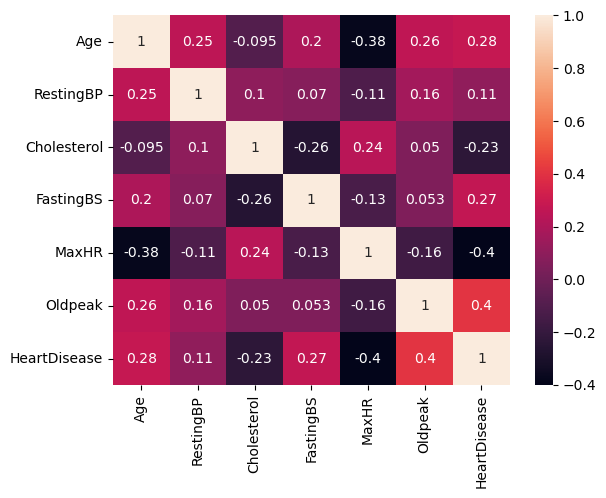

In [28]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [29]:
df_no_outliers.corr(numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.268100,0.064099,0.198880,-0.381402,0.262703,0.281759
RestingBP,0.268100,1.000000,0.095884,0.066666,-0.111328,0.166633,0.112332
Cholesterol,0.064099,0.095884,1.000000,0.040664,-0.014972,0.068481,0.097874
FastingBS,0.198880,0.066666,0.040664,1.000000,-0.131478,0.068770,0.267291
MaxHR,-0.381402,-0.111328,-0.014972,-0.131478,1.000000,-0.172283,-0.401771
Oldpeak,0.262703,0.166633,0.068481,0.068770,-0.172283,1.000000,0.419235
HeartDisease,0.281759,0.112332,0.097874,0.267291,-0.401771,0.419235,1.000000


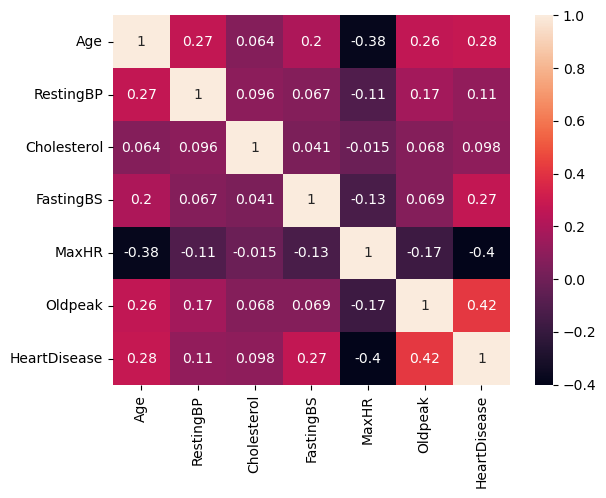

In [30]:
sns.heatmap(df_no_outliers.corr(numeric_only = True), annot = True)
plt.show()

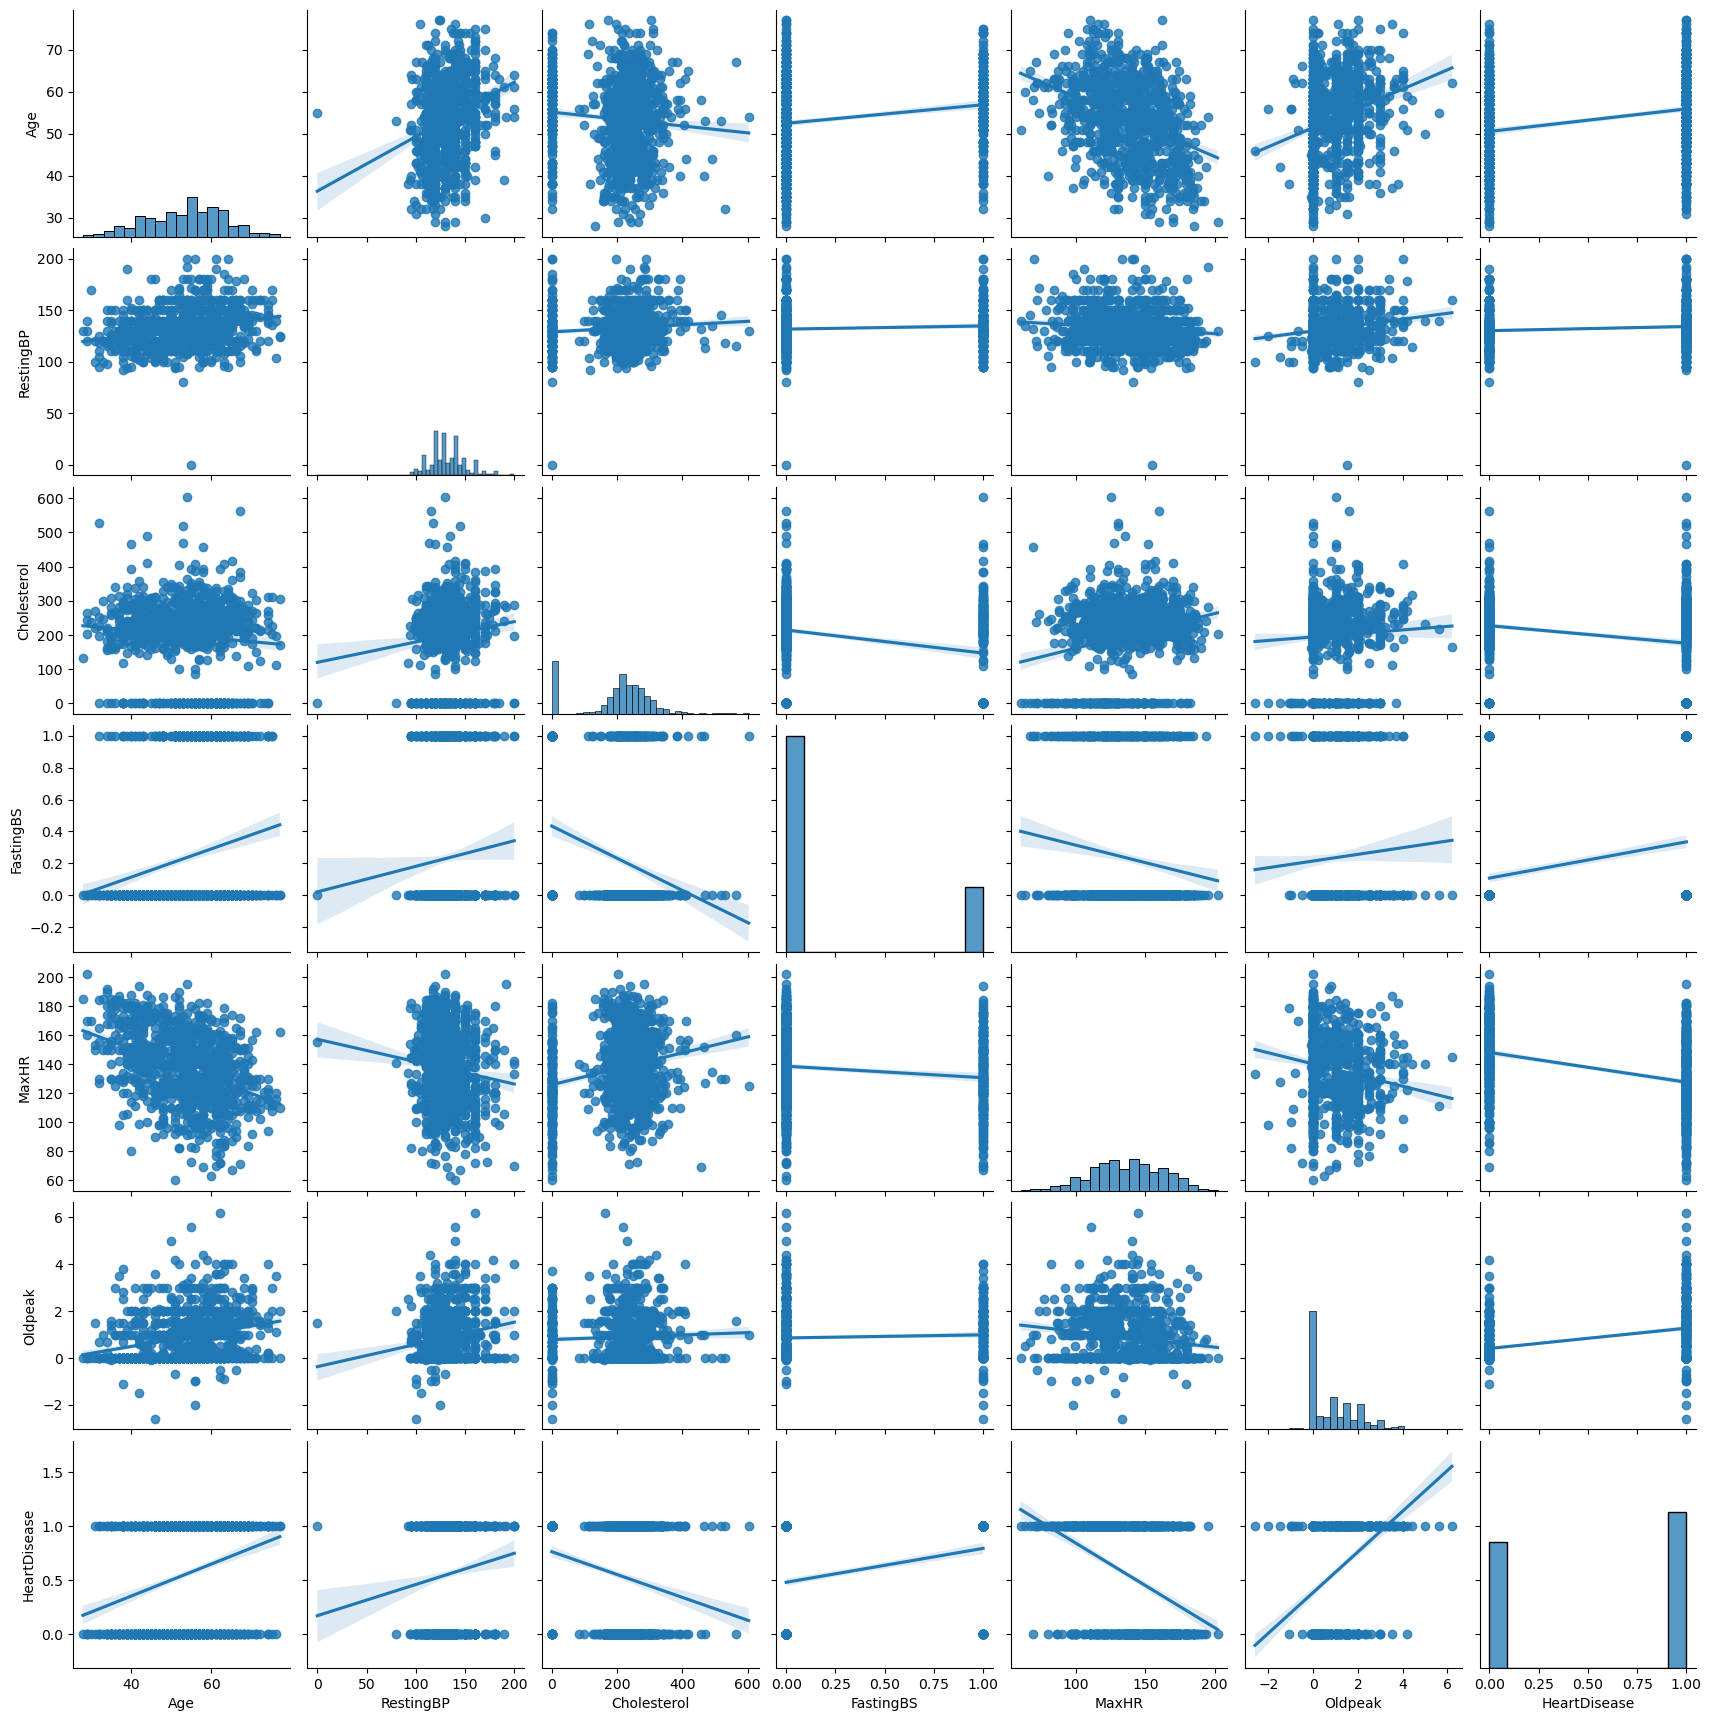

In [31]:
sns.pairplot(df, kind = "reg")
plt.show()

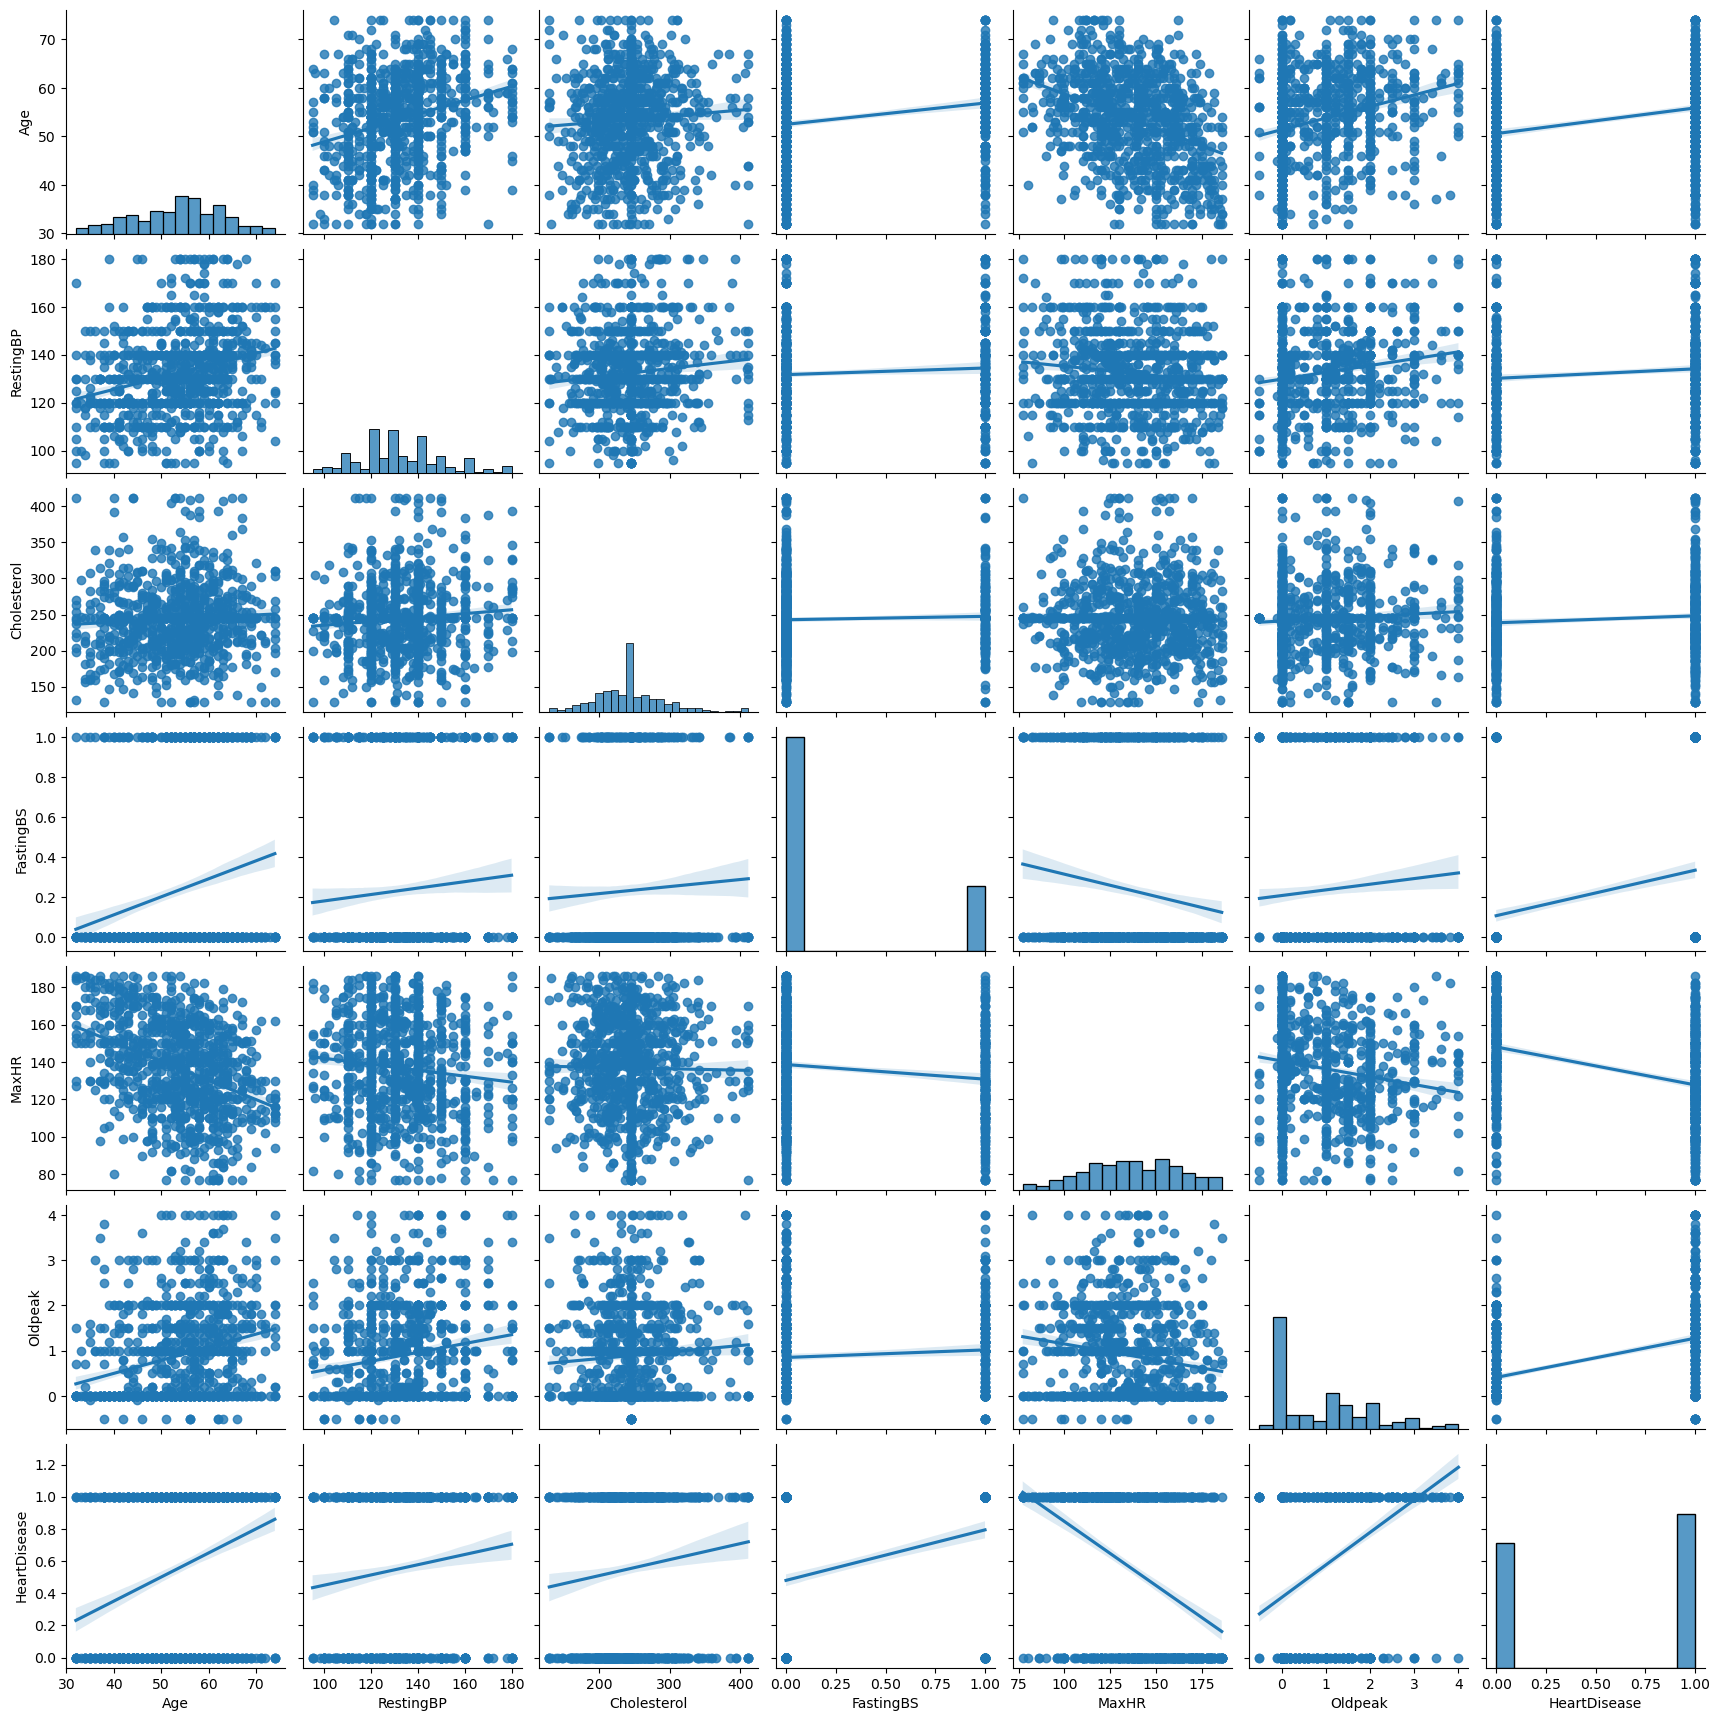

In [32]:
sns.pairplot(df_no_outliers, kind = "reg")
plt.show()

###### Observation:
We cannot deduce somewhat relationship between fasting blood sugar level with any categorical columns, heart disease with age, resting blood pressure, cholesterol level and fasting blood sugar level, as regression lines show very low slopes (indicating weak relationships) or the data points might not follow the line closely (indicating high variability).

## Findings and Recommendations

Here's our top findings and recommendations:
1. **Age** (mean Age found from dataset = 53.52 years, mode = 54 years, std. dev. = 9.35 years): Having heart disease - age - 52 to 62 years, while not having heart disease - age - 43 years to 57 years but direct relationship is weak. Hence, this result is **inconclusive**. Furthermore, the possibility of having a heart disease in people with different test results are:
- Chest Pain Types:
  - **ATA** - age between 53 to 58 years.
  - **NAP** - age between 51 to 62 years.
  - **TA** - age between 46 to 62 years.
  - **ASY** - age between 50 to 62 years.
- Fasting Blood Sugar level:
  - **>120 mg/dl** - age between 51 to 62 years.
  - **<=120 mg/dl** - age between 50 to 61 years.
- Resting Electrocardiogram:
  - **Normal** - age between 49 to 60 years.
  - **ST** - age between 55 to 63 years.
  - **LVH** - age between 55 to 62 years.
- Exercise Induced Angina:
  - **Yes** - age between 51 to 62 years.
  - **No** - age between 49 to 61 years.
- ST_Slope:
  - **Up** - age between 51 to 61 years.
  - **Flat** - age between 50 to 61 years.
  - **Down** - age between 56 to 62 years.
2. **Resting Blood Pressure** (mean Restingbp found from dataset = 132.39 mm Hg, mode = 120 mm Hg, std. dev. = 17.58 mm Hg): The relationship is weak. Hence, direct relationship is **inconclusive**. Furthermore, the possibility of having a heart disease in people with different test results are:
- Sex:
  - **Females** - restingbp between 130 to 160 mm Hg.
  - **Males** - restingbp between 120 to 145 mm Hg.
- Chest Pain Types:
  - **ATA** - restingbp between 120 to 155 mm Hg.
  - **NAP** - restingbp between 120 to 140 mm Hg.
  - **TA** - restingbp between 120 to 145 mm Hg.
  - **ASY** - restingbp between 120 to 145 mm Hg.
- Resting Electrocardiogram:
  - **Normal** - restingbp between 120 to 140 mm Hg.
  - **ST** - restingbp between 130 to 150 mm Hg.
  - **LVH** - restingbp between 118 to 150 mm Hg.
- Exercise Induced Angina:
  - **Yes** - restingbp between 125 to 145 mm Hg.
  - **No** - restingbp between 120 to 140 mm Hg.
- ST_Slope:
  - **Up** - restingbp between 120 to 140 mm Hg.
  - **Flat** - restingbp between 118 to 148 mm Hg.
  - **Down** - restingbp between 120 to 140 mm Hg.
3. **Cholesterol** (mean Cholesterol level found from dataset = 243.93 mm/dl, mode = 244.64 mm/dl, std. dev. = 48.91 mm/dl): The relationship is weak. Hence, direct relationship result is **inconclusive**. Furthermore, the possibility of having a heart disease in people with different test results are:
- Sex:
  - **Females** - cholesterol level between 240 to 305 mm/dl.
  - **Males** - cholesterol level between 215 to 260 mm/dl.
- Chest Pain Types:
  - **ATA** - cholesterol level between 240 to 280 mm/dl.
  - **NAP** - cholesterol level between 215 to 240 mm/dl.
  - **TA** - cholesterol level between 235 to 265 mm/dl.
  - **ASY** - cholesterol level between 230 to 260 mm/dl.
- Fasting Blood Sugar level:
  - **>120 mg/dl** - cholesterol level between 245 to 255 mm/dl.
  - **<=120 mg/dl** - cholesterol level between 215 to 260 mm/dl.
- Resting Electrocardiogram:
  - **Normal** - cholesterol level between 225 to 260 mm/dl.
  - **ST** - cholesterol level between 220 to 255 mm/dl.
  - **LVH** - cholesterol level between 225 to 270 mm/dl.
- Exercise Induced Angina:
  - **Yes** - cholesterol level between 225 to 270 mm/dl.
  - **No** - cholesterol level between 230 to 260 mm/dl.
- ST_Slope:
  - **Up** - cholesterol level between 240 to 255 mm/dl.
  - **Flat** - cholesterol level between 225 to 265 mm/dl.
  - **Down** - cholesterol level between 220 to 250 mm/dl.
4. **Maximum Heart Rate** (mean MaxHR found from dataset = 136.84, mode =150, std. dev. = 25.12): The relationship is weak. Hence, direct relationship result is **inconclusive**. Furthermore, the possibility of having a heart disease in people with different test results are:
- Sex:
  - **Females** - maxhr level between 122 to 158.
  - **Males** - maxhr level between 114 to 144.
- Chest Pain Types:
  - **ATA** - maxhr level between 118 to 158.
  - **NAP** - maxhr level between 118 to 146.
  - **TA** - maxhr level between 126 to 162.
  - **ASY** - maxhr level between 116 to 144.
- Resting Electrocardiogram:
  - **Normal** - maxhr level between 114 to 144.
  - **ST** - maxhr level between 114 to 140.
  - **LVH** - maxhr level between 120 to 150.
- Exercise Induced Angina:
  - **Yes** - maxhr level between 112 to 138.
  - **No** - maxhr level between 116 to 156.
- ST_Slope:
  - **Up** - maxhr level between 124 to 162.
  - **Flat** - maxhr level between 114 to 142.
  - **Down** - maxhr level between 115 to 142.
5. **Oldpeak** (mean Oldpeak level found from dataset = 0.89, mode =0.0, std. dev. = 1.03): People who do not have a heart disease, have oldpeak level limited mostly within 0 to 1 while people with heart disease have oldpeak level between 0 and 2. Furthermore, the possibility of having a heart disease in people with different test results are:
- Chest Pain Types:
  - **ATA** - oldpeak level between 0 to 1.6.
  - **NAP** - oldpeak level between 0 to 2.1.
  - **TA** - oldpeak level between 0 to 1.9.
  - **ASY** - oldpeak level between 0.1 to 2.1.
- Fasting Blood Sugar level:
  - **>120 mg/dl** - oldpeak level between 0 to 2.
  - **<=120 mg/dl** - oldpeak level between 0 to 1.9.
- Resting Electrocardiogram:
  - **Normal** - oldpeak level between 0 to 1.9.
  - **ST** - oldpeak level between 0.4 to 1.9.
  - **LVH** - oldpeak level between 0.1 to 2.2.
- Exercise Induced Angina:
  - **Yes** - oldpeak level between 0 to 1.8.
  - **No** - oldpeak level between 1.6 to 2.
- ST_Slope:
  - **Up** - oldpeak level between 0 to 1.8.
  - **Flat** - oldpeak level between 0 to 2.
  - **Down** - oldpeak level between 1.8 to 3.
6. The following are most prone to having a heart disease from each column:
- Numerical Columns:
    - **Age** - 49 to 62 years.
    - **Resting Blood Pressure** - 118 to 142 mm Hg.
    - **Cholesterol** - 215 to 265 mm/ dl.
    - **Maximum Heart Rate** - 114 to 150.
    - **Oldpeak** -  0 to 2.
- Categorical Columns:
    - **Sex** - Male (63.2%)
    - **Chest Pain Type** - ASY (79%)
    - **Fasting Blood Sugar** - greater than 120 mg/dl (79.4%)
    - **Resting Electrocardiogram** - ST (65.7%)
    - **Exercise Induced Angina** - Yes Category (85.2%)
    - **ST_Slope** - Flat (82.8%)

### Limitations

- I had to replace 0 values from Cholesterol column with the mean result.
- I have not removed the outliers (within 1% to 99% range) as they helped in finding out the maximum in each category with accuracy, instead I have capped the outliers in a copy view of original dataframe.
- The given dataset have uneven proportion of results from the patients tested, for example, 54% chest pain type ASY patients in which 79% had heart disease, 22.1% NAP chest pain type in which 35.5% had heart disease, 18.8% ATA in which 13.9% had heart disease, and 5% TA in which 43.5% had heart disease. Hence, the result can be highly impacted because of the sample data.

I hope you enjoyed it! Please share your feedback. 😄😅

Check out more such Data Analysis Projects [here](https://github.com/soumyadas96/Data-Analysis-Projects)!

[Click here to view other projects in my repository!](https://github.com/soumyadas96?tab=repositories)